In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt

In [2]:
dt = pd.read_csv(r"C:\Users\sebex\Desktop\Magisterka\magisterka_implementacja\data\ECGCvdata.csv")
dt.head()

,RECORD,hbpermin,Pseg,PQseg,QRSseg,QRseg,QTseg,RSseg,STseg,Tseg,...,RMSSD,QRSarea,QRSperi,PQslope,QRslope,RSslope,STslope,NN50,pNN50,ECG_signal
0,1,74.925669,0.076508,0.108889,0.088254,0.043571,0.193016,0.044683,0.104762,0.130476,...,292.296636,18.457618,63.615239,-0.014364,0.075270,-0.070846,0.012606,2,5.882353,ARR
1,2,68.503469,0.072483,0.096181,0.093924,0.046267,0.193490,0.047656,0.099566,0.089149,...,318.563915,23.043230,67.787773,-0.021207,0.083773,-0.077458,0.016175,1,3.225806,ARR
2,3,83.488603,0.071154,0.086610,0.039530,0.018590,0.132479,0.020940,0.092949,0.094444,...,273.165412,10.756353,29.253827,-0.042542,NaN,NaN,0.027131,16,42.105263,ARR
3,4,68.503469,0.082812,0.108160,0.090365,0.045226,0.188802,0.045139,0.098437,0.088281,...,313.046941,23.845086,65.228737,-0.017806,0.091591,-0.088559,0.017022,2,6.451613,ARR
4,5,82.080000,0.070760,0.102632,0.101023,0.049415,0.193713,0.051608,0.092690,0.085965,...,263.225676,20.942791,72.830353,-0.016650,0.064547,-0.062246,0.016191,2,5.405405,ARR


In [3]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 56 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RECORD      1200 non-null   int64  
 1   hbpermin    1200 non-null   float64
 2   Pseg        1200 non-null   float64
 3   PQseg       1200 non-null   float64
 4   QRSseg      1200 non-null   float64
 5   QRseg       1200 non-null   float64
 6   QTseg       1200 non-null   float64
 7   RSseg       1200 non-null   float64
 8   STseg       1200 non-null   float64
 9   Tseg        1200 non-null   float64
 10  PTseg       1200 non-null   float64
 11  ECGseg      1200 non-null   float64
 12  QRtoQSdur   431 non-null    float64
 13  RStoQSdur   431 non-null    float64
 14  RRmean      1200 non-null   float64
 15  PPmean      1200 non-null   float64
 16  PQdis       1200 non-null   float64
 17  PonQdis     1200 non-null   float64
 18  PRdis       1200 non-null   float64
 19  PonRdis     1200 non-null  

In [4]:
l = []
for row in range(len(dt)):
    l.append(str(type(dt["ECG_signal"].iloc[row])))
l

["<class 'str'>",
 "<class 'str'>",
 "<class 'str'>",
 "<class 'str'>",
 "<class 'str'>",
 "<class 'str'>",
 "<class 'str'>",
 "<class 'str'>",
 "<class 'str'>",
 "<class 'str'>",
 "<class 'str'>",
 "<class 'str'>",
 "<class 'str'>",
 "<class 'str'>",
 "<class 'str'>",
 "<class 'str'>",
 "<class 'str'>",
 "<class 'str'>",
 "<class 'str'>",
 "<class 'str'>",
 "<class 'str'>",
 "<class 'str'>",
 "<class 'str'>",
 "<class 'str'>",
 "<class 'str'>",
 "<class 'str'>",
 "<class 'str'>",
 "<class 'str'>",
 "<class 'str'>",
 "<class 'str'>",
 "<class 'str'>",
 "<class 'str'>",
 "<class 'str'>",
 "<class 'str'>",
 "<class 'str'>",
 "<class 'str'>",
 "<class 'str'>",
 "<class 'str'>",
 "<class 'str'>",
 "<class 'str'>",
 "<class 'str'>",
 "<class 'str'>",
 "<class 'str'>",
 "<class 'str'>",
 "<class 'str'>",
 "<class 'str'>",
 "<class 'str'>",
 "<class 'str'>",
 "<class 'str'>",
 "<class 'str'>",
 "<class 'str'>",
 "<class 'str'>",
 "<class 'str'>",
 "<class 'str'>",
 "<class 'str'>",
 "<class '

In [5]:
l.count("<class 'str'>")

1200

In [6]:
dt.shape

(1200, 56)

In [7]:
dt.columns

Index(['RECORD', 'hbpermin', 'Pseg', 'PQseg', 'QRSseg', 'QRseg', 'QTseg',
       'RSseg', 'STseg', 'Tseg', 'PTseg', 'ECGseg', 'QRtoQSdur', 'RStoQSdur',
       'RRmean', 'PPmean', 'PQdis', 'PonQdis', 'PRdis', 'PonRdis', 'PSdis',
       'PonSdis', 'PTdis', 'PonTdis', 'PToffdis', 'QRdis', 'QSdis', 'QTdis',
       'QToffdis', 'RSdis', 'RTdis', 'RToffdis', 'STdis', 'SToffdis',
       'PonToffdis', 'PonPQang', 'PQRang', 'QRSang', 'RSTang', 'STToffang',
       'RRTot', 'NNTot', 'SDRR', 'IBIM', 'IBISD', 'SDSD', 'RMSSD', 'QRSarea',
       'QRSperi', 'PQslope', 'QRslope', 'RSslope', 'STslope', 'NN50', 'pNN50',
       'ECG_signal'],
      dtype='object')

In [8]:
# pd.set_option('display.max_columns', 500)
dt.describe().applymap('{:.2f}'.format)

C:\Users\sebex\AppData\Local\Temp\ipykernel_2688\891261712.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dt.describe().applymap('{:.2f}'.format)


,RECORD,hbpermin,Pseg,PQseg,QRSseg,QRseg,QTseg,RSseg,STseg,Tseg,...,SDSD,RMSSD,QRSarea,QRSperi,PQslope,QRslope,RSslope,STslope,NN50,pNN50
count,1200.00,1200.00,1200.00,1200.00,1200.00,1200.00,1200.00,1200.00,1200.00,1200.00,...,1200.00,1200.00,1200.00,1200.00,1200.00,432.00,431.00,1200.00,1200.00,1200.00
mean,600.50,81.89,0.06,0.08,0.05,0.02,0.14,0.02,0.09,0.10,...,42.48,199.42,7.68,23.92,-0.07,0.14,-0.15,0.04,6.44,8.11
std,346.55,19.32,0.01,0.02,0.03,0.02,0.03,0.02,0.01,0.02,...,105.72,112.29,8.45,25.07,0.05,0.07,0.08,0.03,7.75,10.33
min,1.00,12.86,0.02,0.04,0.00,0.00,0.10,0.00,0.05,0.03,...,0.80,61.71,0.00,0.00,-0.22,0.03,-0.32,0.01,0.00,0.00
25%,300.75,67.56,0.05,0.06,0.02,0.01,0.12,0.01,0.09,0.09,...,4.06,123.15,0.00,0.12,-0.11,0.08,-0.24,0.02,1.00,0.61
50%,600.50,79.87,0.06,0.08,0.04,0.02,0.14,0.02,0.10,0.10,...,11.27,183.60,5.23,19.90,-0.06,0.11,-0.12,0.03,3.00,3.68
75%,900.25,96.00,0.07,0.10,0.08,0.04,0.17,0.04,0.10,0.11,...,44.79,248.10,14.36,46.19,-0.03,0.23,-0.09,0.05,10.00,12.88
max,1200.00,160.50,0.10,0.15,0.12,0.07,0.21,0.06,0.14,0.20,...,1725.93,1478.49,33.13,86.58,-0.01,0.27,-0.03,0.16,37.00,52.73


In [9]:
# Drop "RECORD" column
dt.drop(labels=["RECORD"], axis=1, inplace=True)
dt.head()

,hbpermin,Pseg,PQseg,QRSseg,QRseg,QTseg,RSseg,STseg,Tseg,PTseg,...,RMSSD,QRSarea,QRSperi,PQslope,QRslope,RSslope,STslope,NN50,pNN50,ECG_signal
0,74.925669,0.076508,0.108889,0.088254,0.043571,0.193016,0.044683,0.104762,0.130476,0.301905,...,292.296636,18.457618,63.615239,-0.014364,0.075270,-0.070846,0.012606,2,5.882353,ARR
1,68.503469,0.072483,0.096181,0.093924,0.046267,0.193490,0.047656,0.099566,0.089149,0.289670,...,318.563915,23.043230,67.787773,-0.021207,0.083773,-0.077458,0.016175,1,3.225806,ARR
2,83.488603,0.071154,0.086610,0.039530,0.018590,0.132479,0.020940,0.092949,0.094444,0.219088,...,273.165412,10.756353,29.253827,-0.042542,NaN,NaN,0.027131,16,42.105263,ARR
3,68.503469,0.082812,0.108160,0.090365,0.045226,0.188802,0.045139,0.098437,0.088281,0.296962,...,313.046941,23.845086,65.228737,-0.017806,0.091591,-0.088559,0.017022,2,6.451613,ARR
4,82.080000,0.070760,0.102632,0.101023,0.049415,0.193713,0.051608,0.092690,0.085965,0.296345,...,263.225676,20.942791,72.830353,-0.016650,0.064547,-0.062246,0.016191,2,5.405405,ARR


In [10]:
# Decision attribute "ECG_signal" research (y)
dt["ECG_signal"].value_counts()

ECG_signal
ARR    300
AFF    300
CHF    300
NSR    300
Name: count, dtype: int64

In [11]:
sum_null_col = dt.isnull().sum()
sum_null_col.sort_values(ascending=False,
                         inplace=True)
print(sum_null_col)

RSslope       769
QRSang        769
RSTang        769
QRtoQSdur     769
RStoQSdur     769
QRslope       768
PQRang        768
PonPQang      557
STToffang     426
hbpermin        0
SDRR            0
STdis           0
SToffdis        0
PonToffdis      0
RRTot           0
NNTot           0
IBISD           0
IBIM            0
RTdis           0
SDSD            0
RMSSD           0
QRSarea         0
QRSperi         0
PQslope         0
STslope         0
NN50            0
pNN50           0
RToffdis        0
QToffdis        0
RSdis           0
Pseg            0
PQseg           0
QRSseg          0
QRseg           0
QTseg           0
RSseg           0
STseg           0
Tseg            0
PTseg           0
ECGseg          0
RRmean          0
PPmean          0
PQdis           0
PonQdis         0
PRdis           0
PonRdis         0
PSdis           0
PonSdis         0
PTdis           0
PonTdis         0
PToffdis        0
QRdis           0
QSdis           0
QTdis           0
ECG_signal      0
dtype: int

In [ ]:
# dt.drop(["RSslope", "QRSang", "RSTang", "QRtoQSdur", "RStoQSdur", "QRslope", "PQRang", "PonPQang", "STToffang"], axis=1, inplace=True)

In [70]:
sum_null_col = dt.isnull().sum()
sum_null_col.sort_values(ascending=False, inplace=True)
print(sum_null_col)

hbpermin      0
SDRR          0
RToffdis      0
STdis         0
SToffdis      0
PonToffdis    0
PonPQang      0
PQRang        0
QRSang        0
RSTang        0
STToffang     0
RRTot         0
NNTot         0
IBIM          0
RSdis         0
IBISD         0
SDSD          0
RMSSD         0
QRSarea       0
QRSperi       0
PQslope       0
QRslope       0
RSslope       0
STslope       0
NN50          0
pNN50         0
RTdis         0
QToffdis      0
Pseg          0
RRmean        0
PQseg         0
QRSseg        0
QRseg         0
QTseg         0
RSseg         0
STseg         0
Tseg          0
PTseg         0
ECGseg        0
QRtoQSdur     0
RStoQSdur     0
PPmean        0
QTdis         0
PQdis         0
PonQdis       0
PRdis         0
PonRdis       0
PSdis         0
PonSdis       0
PTdis         0
PonTdis       0
PToffdis      0
QRdis         0
QSdis         0
ECG_signal    0
dtype: int64


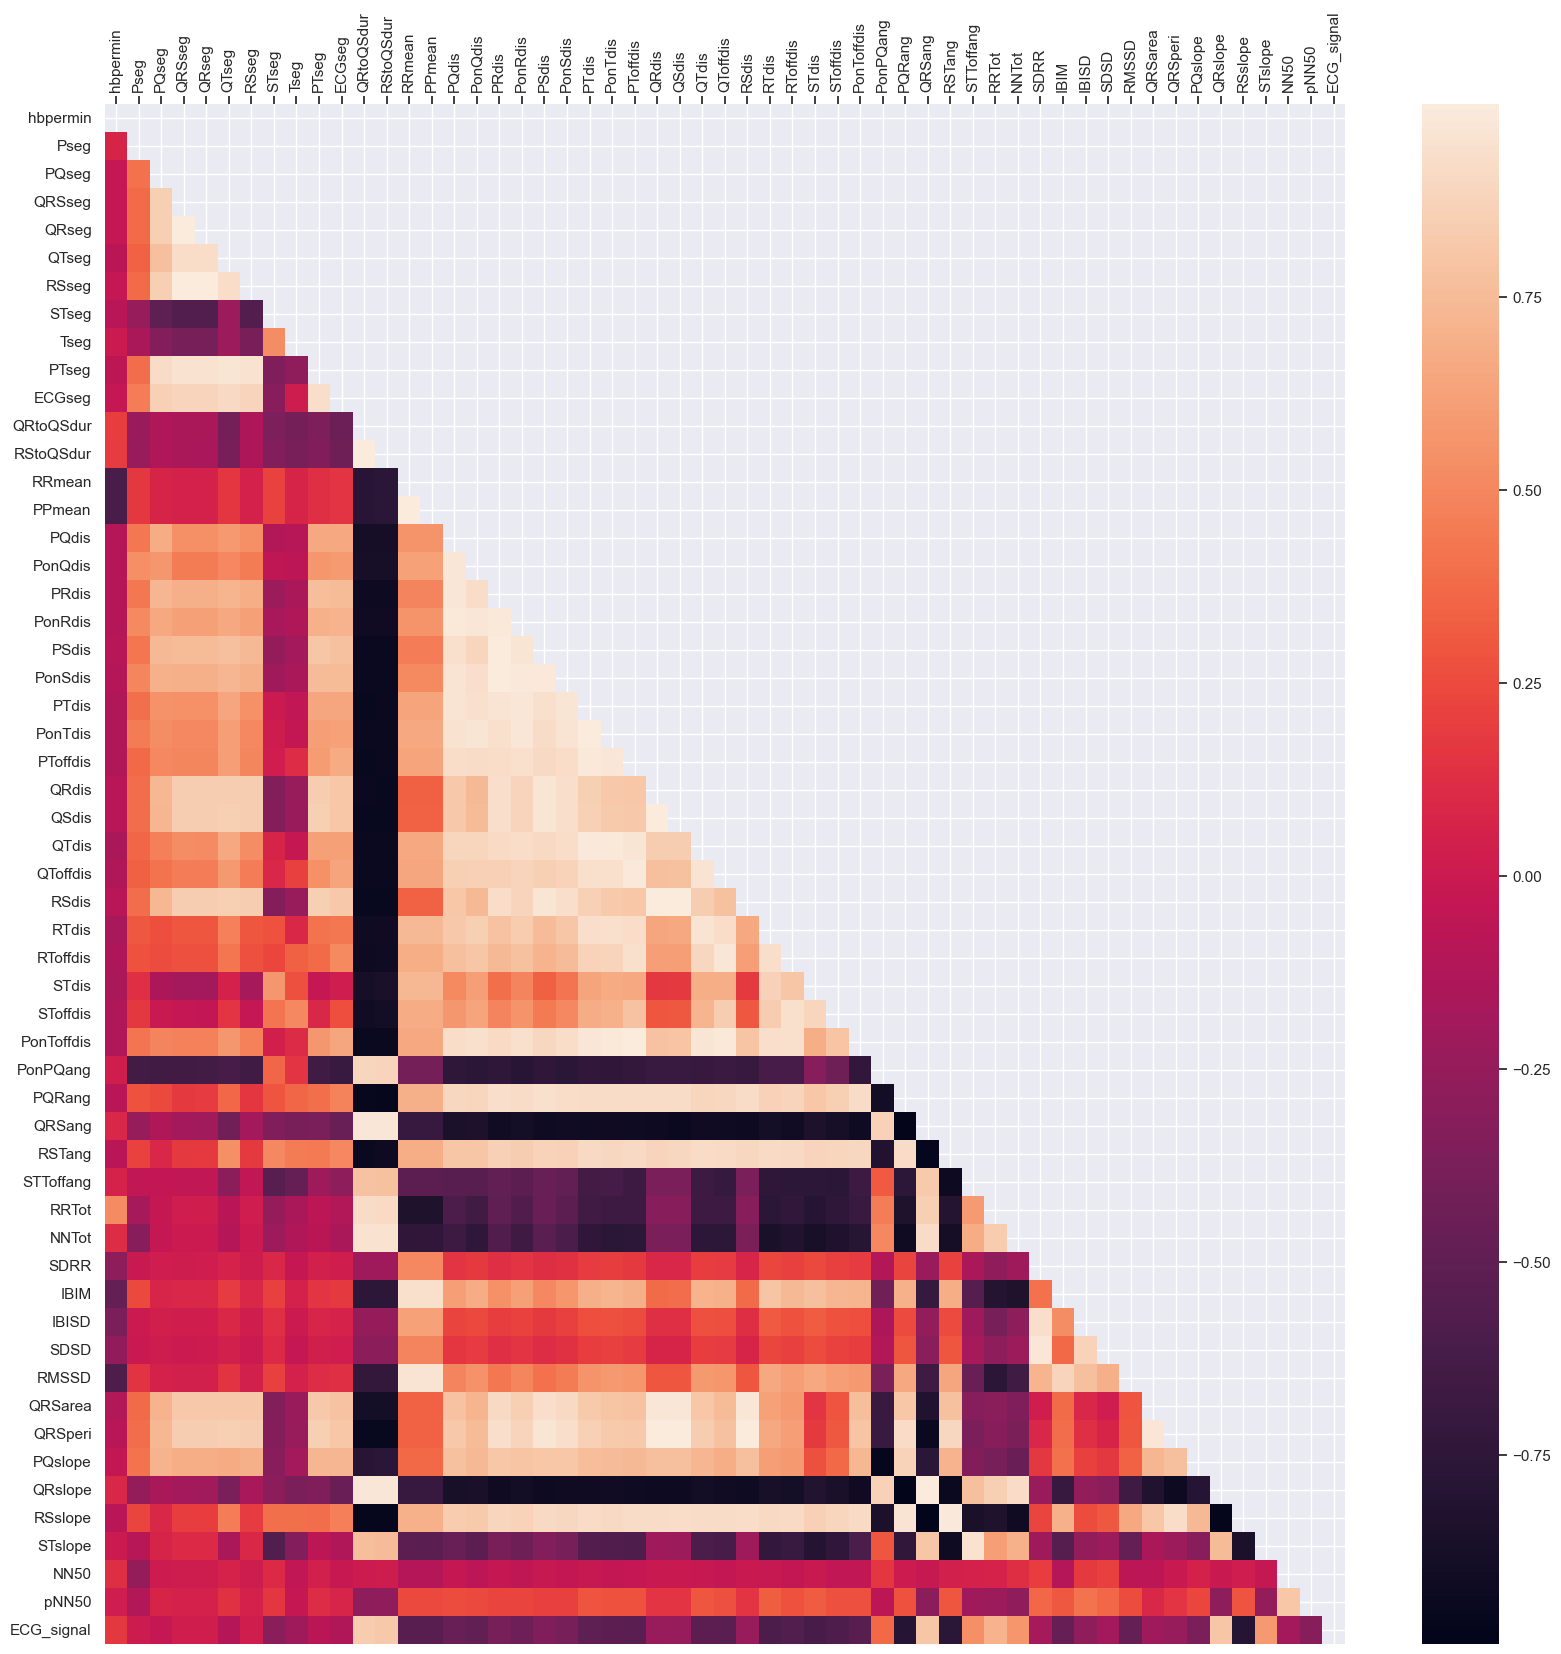

In [9]:
# Encoding decision attribute
le = LabelEncoder()
dt["ECG_signal"] = le.fit_transform(dt["ECG_signal"])

mask = np.triu(np.ones_like(dt.corr(), dtype=bool))
ax = sns.heatmap(dt.corr(), mask=mask, annot=False)
# ax = sns.heatmap(dt.corr(), mask=mask, annot=True, annot_kws={"size": 10})
ax.set(xlabel="", ylabel="")
sns.set_theme(rc={'figure.figsize':(20, 20)})
ax.set_xticklabels(dt.columns, rotation=90)
ax.xaxis.tick_top()

"RSslope" has high correlation to "QRSperi"
"QRSang" has high correlation to "PPmean"
"RSTang" has high correlation to "PTdis"
"QRtoQSdur" has high correlation to "NNTot"
"RStoQSdur" has high correlation to "QRtoQSdur"
"QRslope" has high correlation to "QRSang"
"PQRang" has high correlation to "PonTdis"
"PonPQang" has high correlation to "PonRdis"
"STToffang" has high correlation to "SToffdis"

In [27]:
new_dt = dt[["RSslope", "QRSperi"]].dropna(axis=0)
new_dt = new_dt.assign(corr=lambda row: row["RSslope"] / row["QRSperi"])
RSslope_corr = new_dt["corr"].mean()
dt["RSslope"].fillna(dt["QRSperi"] * RSslope_corr, inplace=True)

new_dt = dt[["QRSang", "PPmean"]].dropna(axis=0)
new_dt = new_dt.assign(corr=lambda row: row["QRSang"] / row["PPmean"])
QRSang_corr = new_dt["corr"].mean()
dt["QRSang"].fillna(dt["PPmean"] * QRSang_corr, inplace=True)

new_dt = dt[["RSTang", "PTdis"]].dropna(axis=0)
new_dt = new_dt.assign(corr=lambda row: row["RSTang"] / row["PTdis"])
RSTang_corr = new_dt["corr"].mean()
dt["RSTang"].fillna(dt["PTdis"] * RSTang_corr, inplace=True)

new_dt = dt[["QRtoQSdur", "NNTot"]].dropna(axis=0)
new_dt = new_dt.assign(corr=lambda row: row["QRtoQSdur"] / row["NNTot"])
QRtoQSdur_corr = new_dt["corr"].mean()
dt["QRtoQSdur"].fillna(dt["NNTot"] * QRtoQSdur_corr, inplace=True)

new_dt = dt[["PQRang", "PonTdis"]].dropna(axis=0)
new_dt = new_dt.assign(corr=lambda row: row["PQRang"] / row["PonTdis"])
PQRang_corr = new_dt["corr"].mean()
dt["PQRang"].fillna(dt["PonTdis"] * PQRang_corr, inplace=True)

new_dt = dt[["PonPQang", "PonRdis"]].dropna(axis=0)
new_dt = new_dt.assign(corr=lambda row: row["PonPQang"] / row["PonRdis"])
PonPQang_corr = new_dt["corr"].mean()
dt["PonPQang"].fillna(dt["PonRdis"] * PonPQang_corr, inplace=True)

new_dt = dt[["STToffang", "SToffdis"]].dropna(axis=0)
new_dt = new_dt.assign(corr=lambda row: row["STToffang"] / row["SToffdis"])
STToffang_corr = new_dt["corr"].mean()
dt["STToffang"].fillna(dt["SToffdis"] * STToffang_corr, inplace=True)

new_dt = dt[["QRslope", "QRSang"]].dropna(axis=0)
new_dt = new_dt.assign(corr=lambda row: row["QRslope"] / row["QRSang"])
QRslope_corr = new_dt["corr"].mean()
dt["QRslope"].fillna(dt["QRSang"] * QRslope_corr, inplace=True)

new_dt = dt[["RStoQSdur", "QRtoQSdur"]].dropna(axis=0)
new_dt = new_dt.assign(corr=lambda row: row["RStoQSdur"] / row["QRtoQSdur"])
RStoQSdur_corr = new_dt["corr"].mean()
dt["RStoQSdur"].fillna(dt["QRtoQSdur"] * RStoQSdur_corr, inplace=True)

In [ ]:
import numpy as np

n = 100
x = np.linspace(0, 1, n)
y = 2*x + 0.3

a, b = np.polyfit(x, y, 1)
print(f"a={a}, b={b}")

In [ ]:
def fill_attr_with_lr(data: pd.DataFrame, attr_with_na: str, attr_without_na: str) -> None:
    """Fill attribute with empty records with linear regression using attribute
    without empty records.

    Parameters
    ----------
    data: pd.DataFrame
        DataFrame which includes involved attributes in the operation.
    attr_with_na: str
        Attribute with empty values to be filled.
    attr_without_na: str
        Attribute without empty values, needed to find linear regression factors.

    """
    new_dt = data[[attr_with_na, attr_without_na]].dropna(axis=0)
    a, b = np.polyfit(new_dt[attr_without_na], new_dt[attr_with_na], 1)  # attr_with_na = a * attr_without_na + b
    data[attr_with_na].fillna(a * data[attr_without_na] + b, inplace=True)

In [11]:
fill_attr_with_lr(dt, "RSslope", "QRSperi")
fill_attr_with_lr(dt, "QRSang", "PPmean")
fill_attr_with_lr(dt, "RSTang", "PTdis")
fill_attr_with_lr(dt, "QRtoQSdur", "NNTot")
fill_attr_with_lr(dt, "PQRang", "PonTdis")
fill_attr_with_lr(dt, "PonPQang", "PonRdis")
fill_attr_with_lr(dt, "STToffang", "SToffdis")
fill_attr_with_lr(dt, "QRslope", "QRSang")
fill_attr_with_lr(dt, "RStoQSdur", "QRtoQSdur")

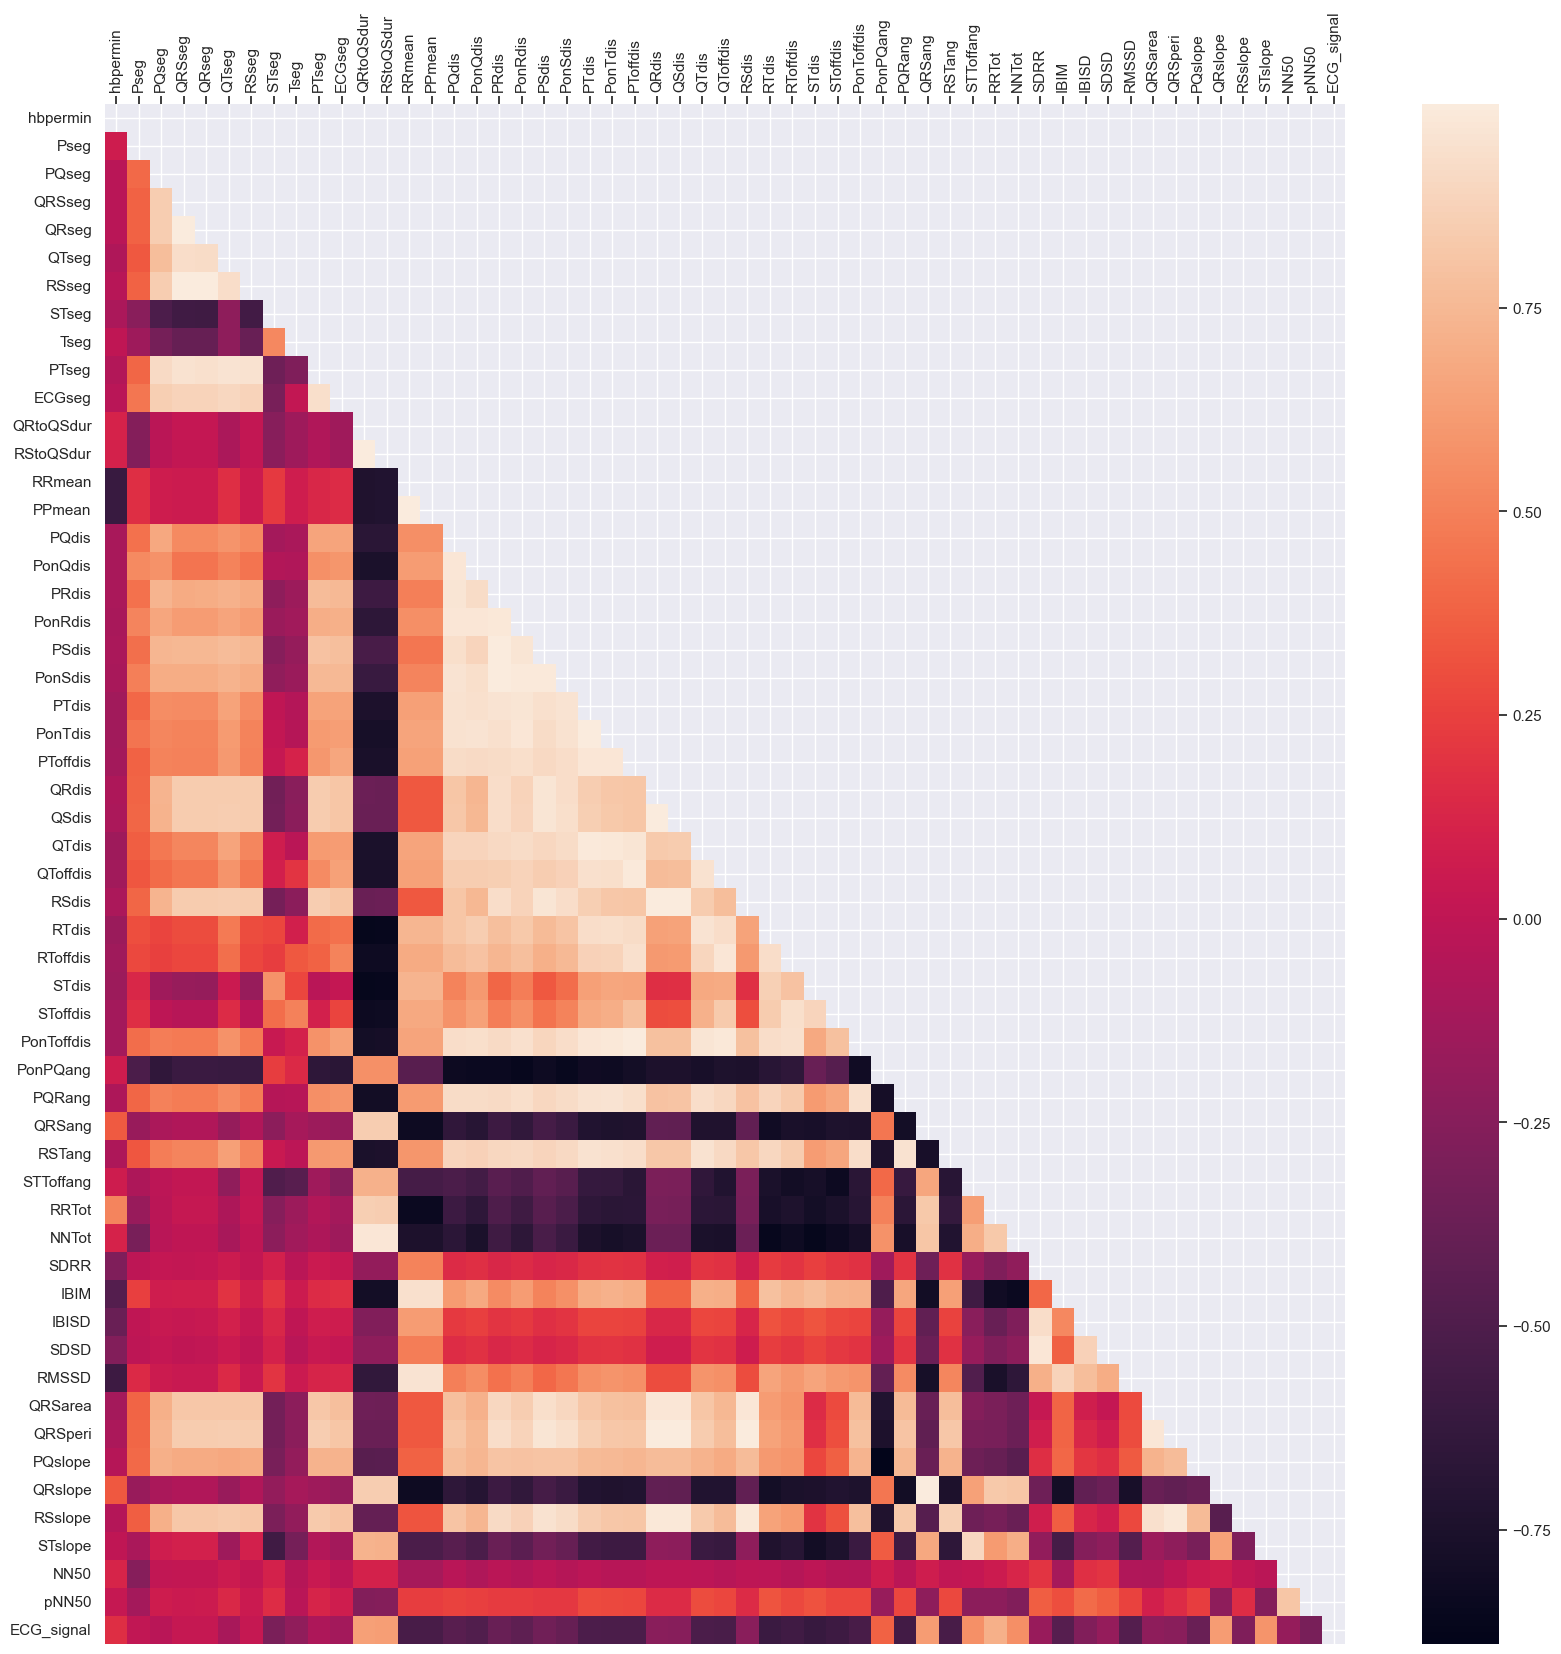

In [12]:
mask = np.triu(np.ones_like(dt.corr(), dtype=bool))
ax = sns.heatmap(dt.corr(), mask=mask, annot=False)
# ax = sns.heatmap(dt.corr(), mask=mask, annot=True, annot_kws={"size": 10})
ax.set(xlabel="", ylabel="")
sns.set_theme(rc={'figure.figsize':(20, 20)})
ax.set_xticklabels(dt.columns, rotation=90)
ax.xaxis.tick_top()

C:\Users\sebex\AppData\Local\Temp\ipykernel_2972\379383750.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dt, x="ECG_signal", y=attribute, palette=my_pal)


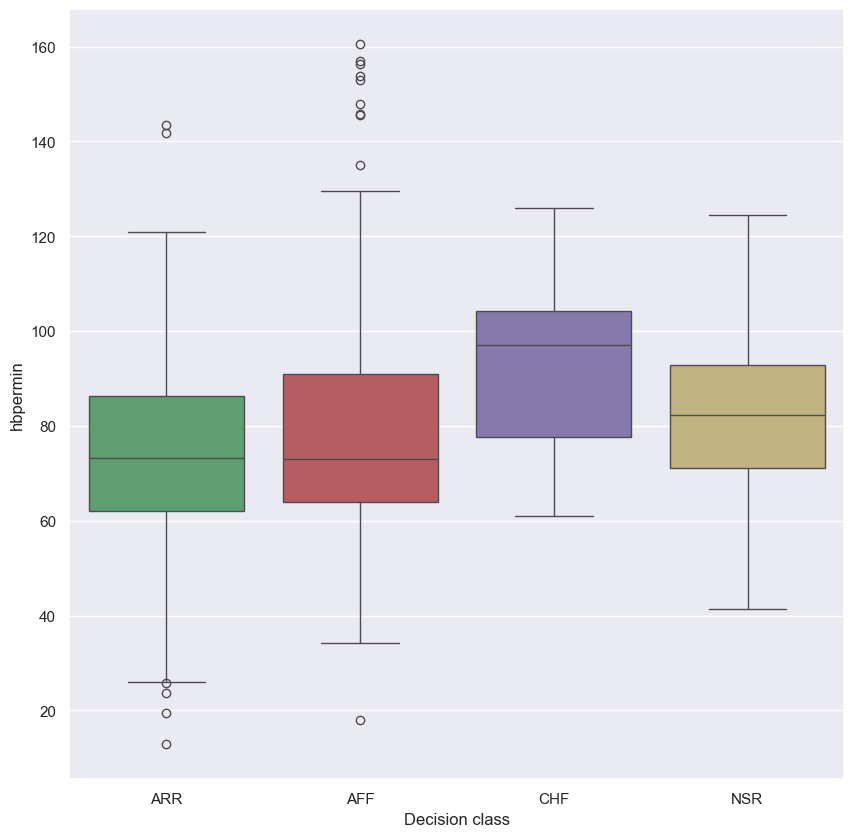

C:\Users\sebex\AppData\Local\Temp\ipykernel_2972\379383750.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dt, x="ECG_signal", y=attribute, palette=my_pal)


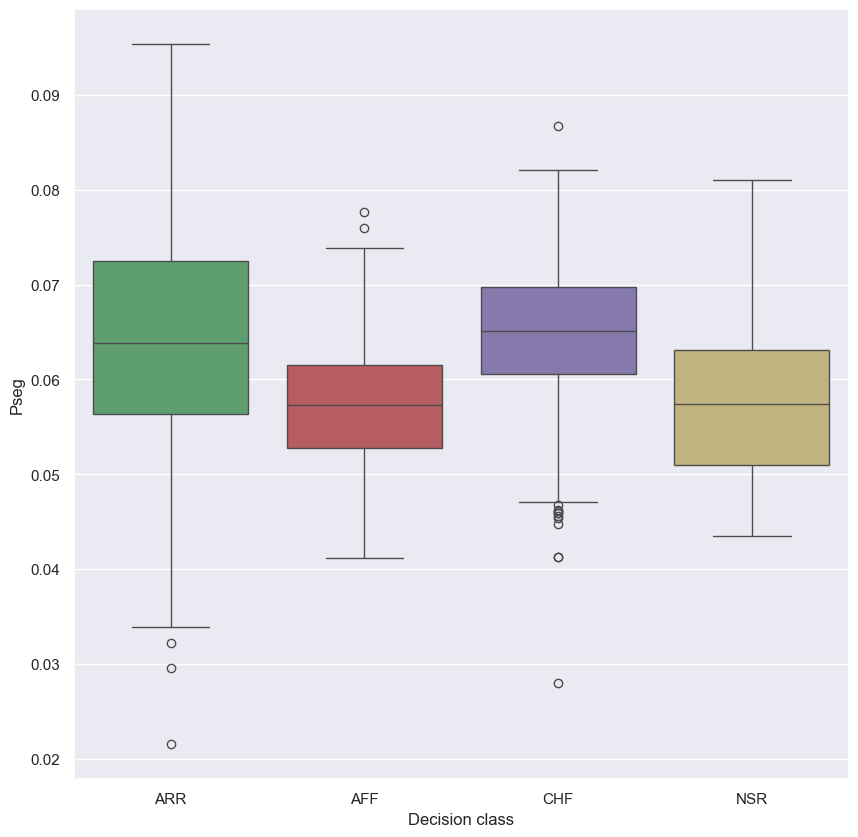

C:\Users\sebex\AppData\Local\Temp\ipykernel_2972\379383750.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dt, x="ECG_signal", y=attribute, palette=my_pal)


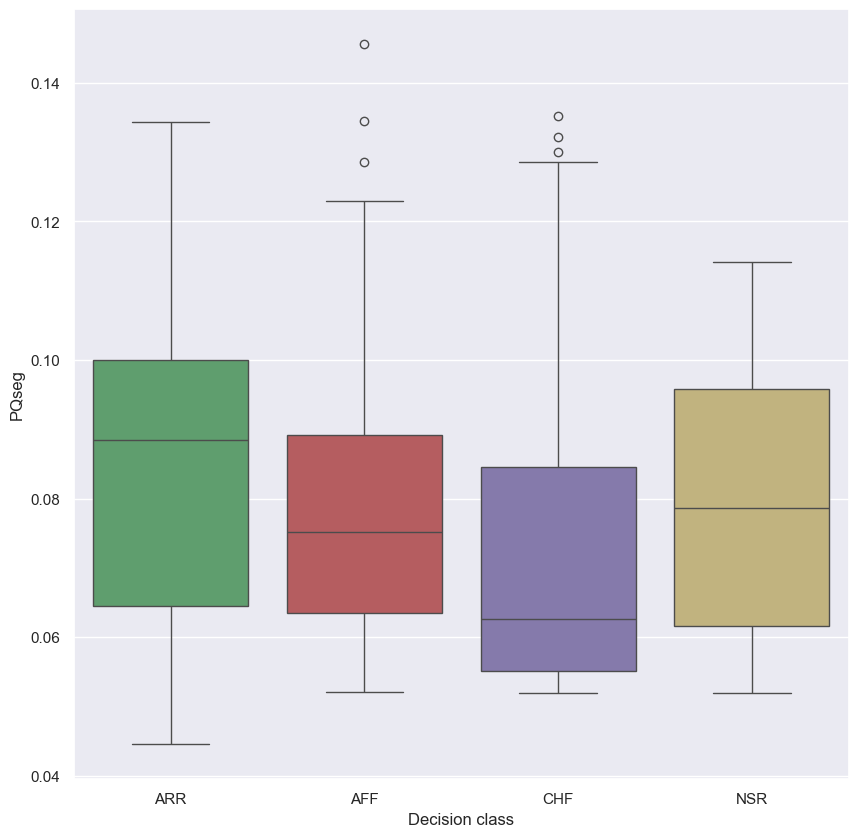

C:\Users\sebex\AppData\Local\Temp\ipykernel_2972\379383750.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dt, x="ECG_signal", y=attribute, palette=my_pal)


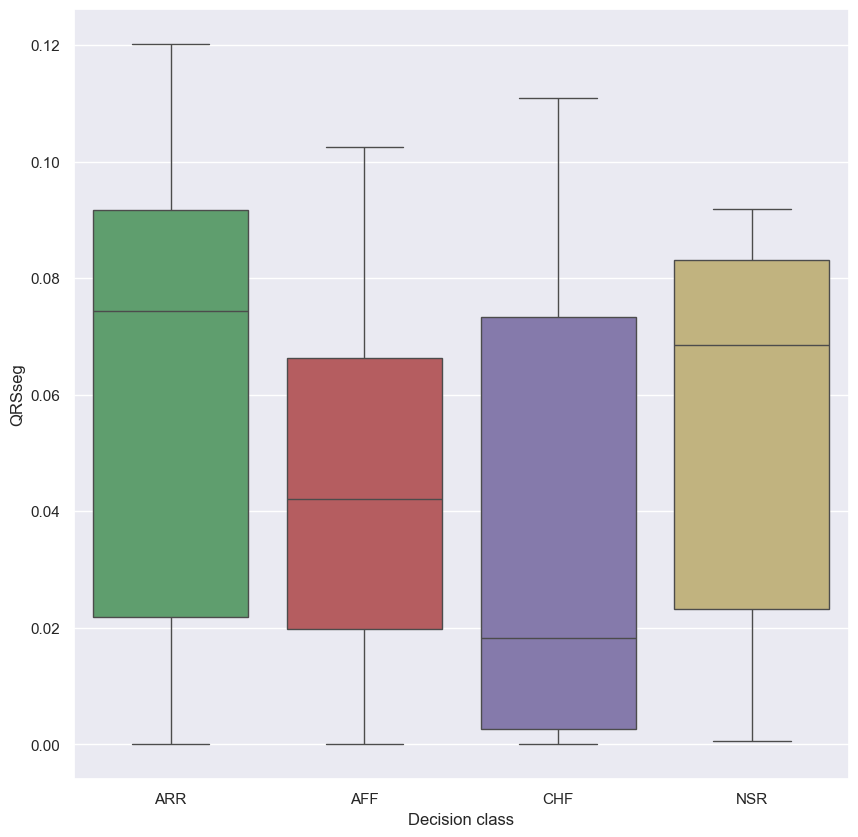

C:\Users\sebex\AppData\Local\Temp\ipykernel_2972\379383750.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dt, x="ECG_signal", y=attribute, palette=my_pal)


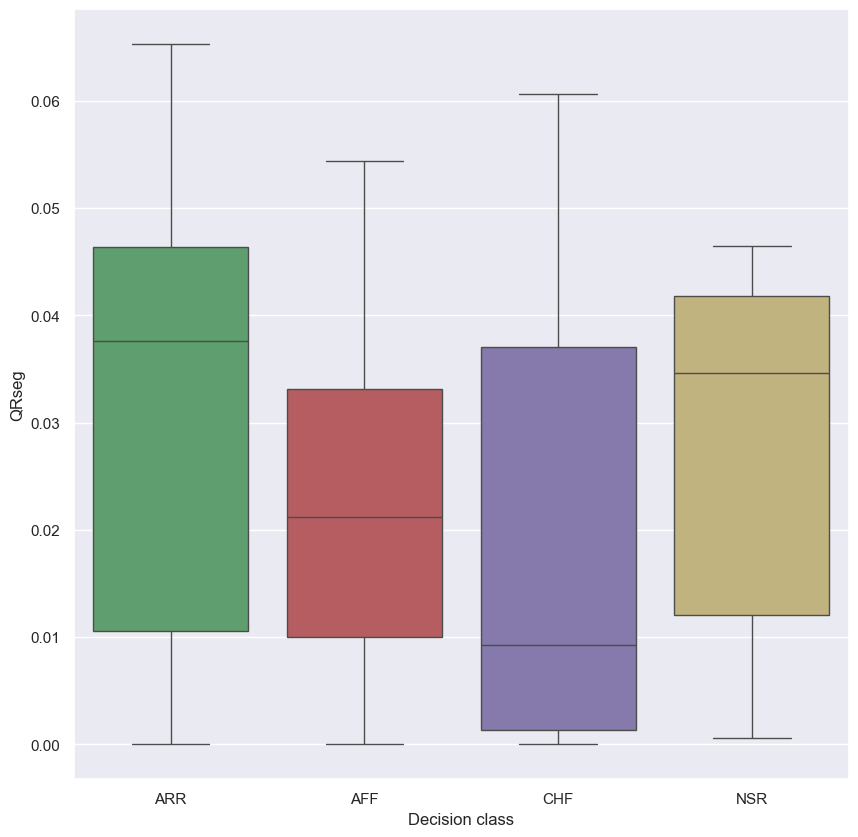

C:\Users\sebex\AppData\Local\Temp\ipykernel_2972\379383750.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dt, x="ECG_signal", y=attribute, palette=my_pal)


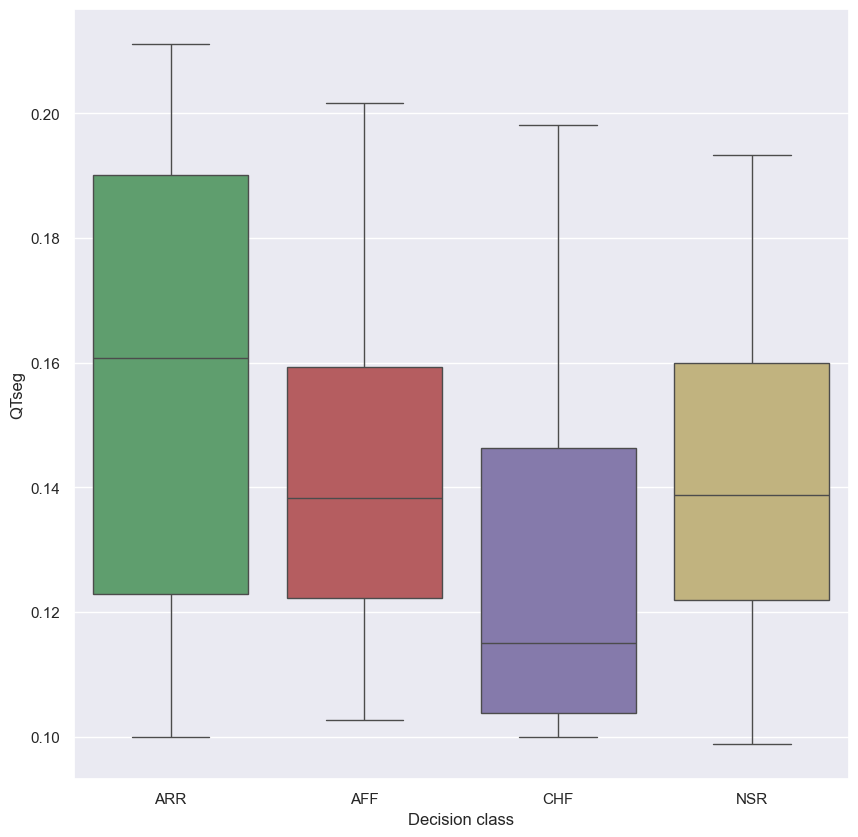

C:\Users\sebex\AppData\Local\Temp\ipykernel_2972\379383750.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dt, x="ECG_signal", y=attribute, palette=my_pal)


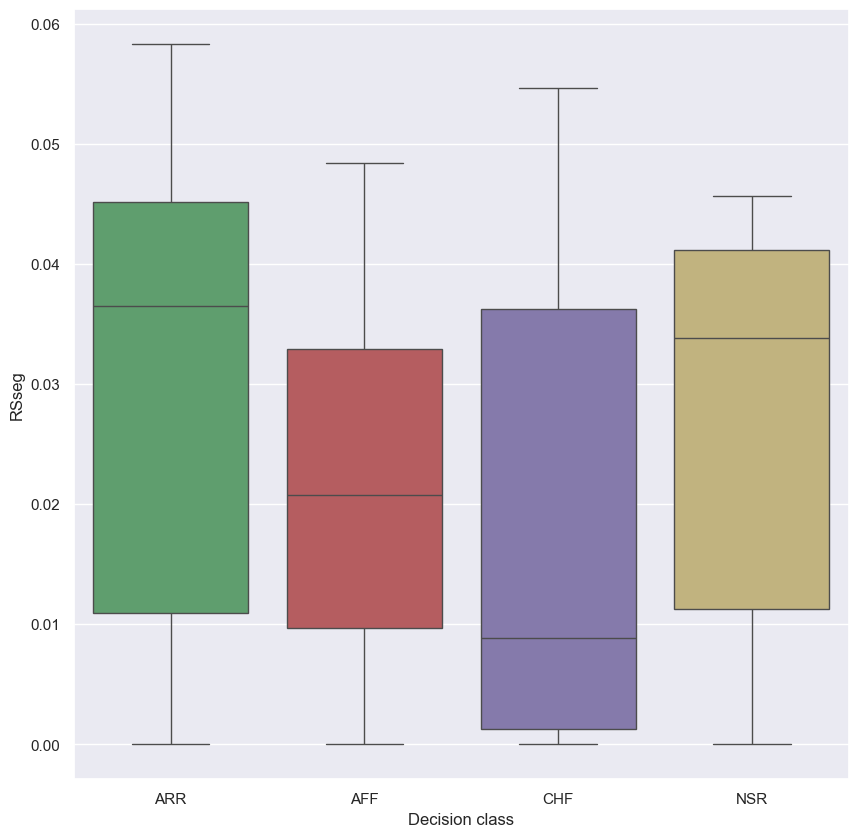

C:\Users\sebex\AppData\Local\Temp\ipykernel_2972\379383750.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dt, x="ECG_signal", y=attribute, palette=my_pal)


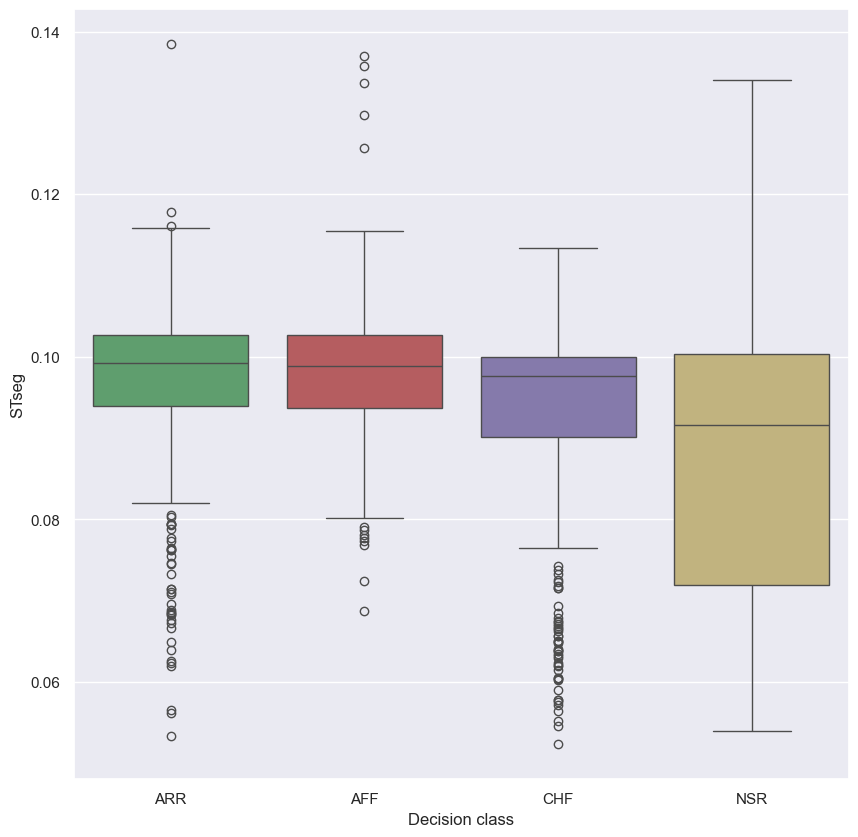

C:\Users\sebex\AppData\Local\Temp\ipykernel_2972\379383750.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dt, x="ECG_signal", y=attribute, palette=my_pal)


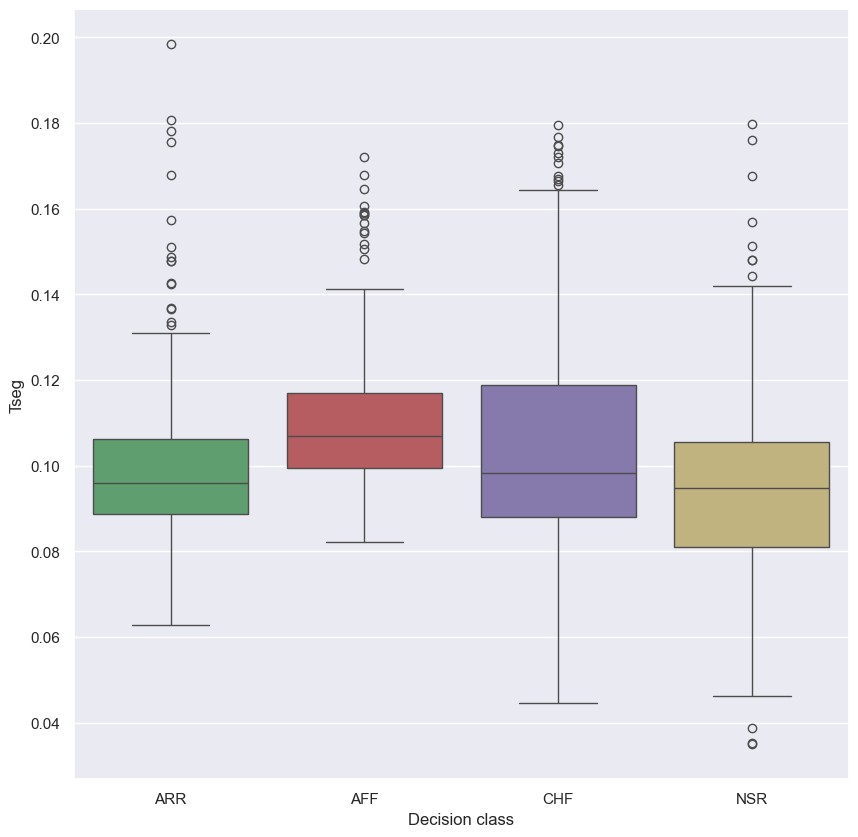

C:\Users\sebex\AppData\Local\Temp\ipykernel_2972\379383750.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dt, x="ECG_signal", y=attribute, palette=my_pal)


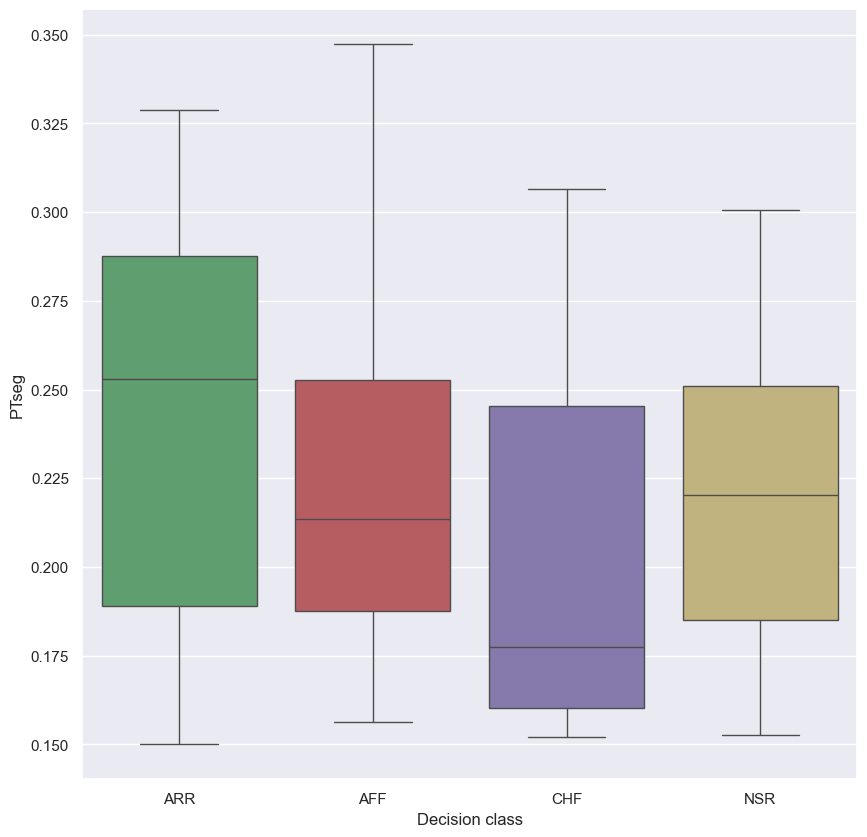

C:\Users\sebex\AppData\Local\Temp\ipykernel_2972\379383750.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dt, x="ECG_signal", y=attribute, palette=my_pal)


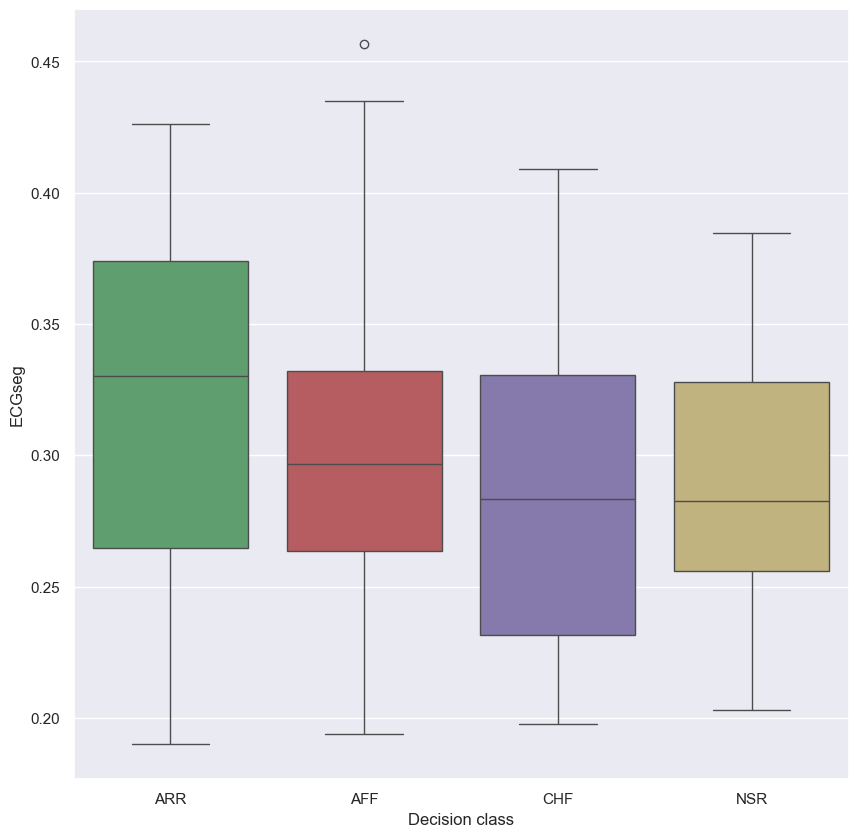

C:\Users\sebex\AppData\Local\Temp\ipykernel_2972\379383750.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dt, x="ECG_signal", y=attribute, palette=my_pal)


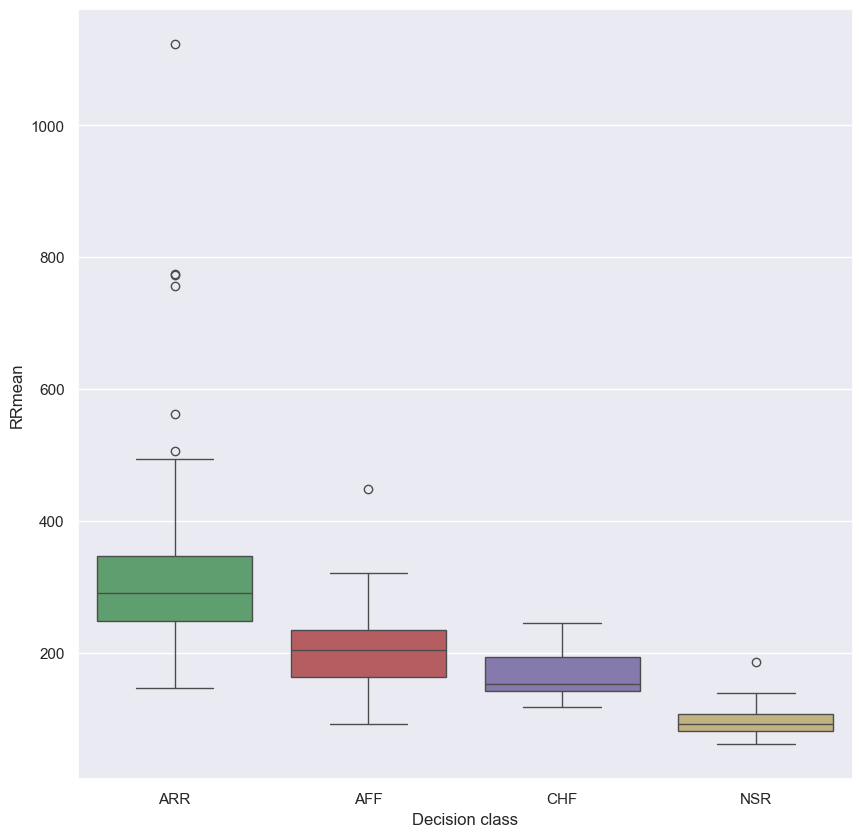

C:\Users\sebex\AppData\Local\Temp\ipykernel_2972\379383750.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dt, x="ECG_signal", y=attribute, palette=my_pal)


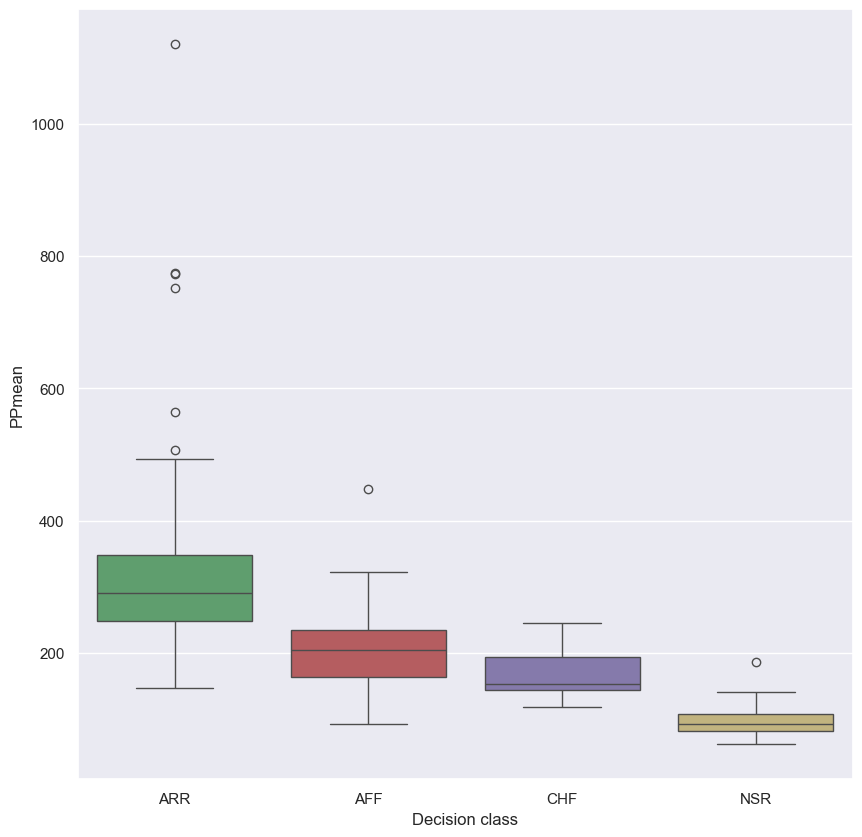

C:\Users\sebex\AppData\Local\Temp\ipykernel_2972\379383750.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dt, x="ECG_signal", y=attribute, palette=my_pal)


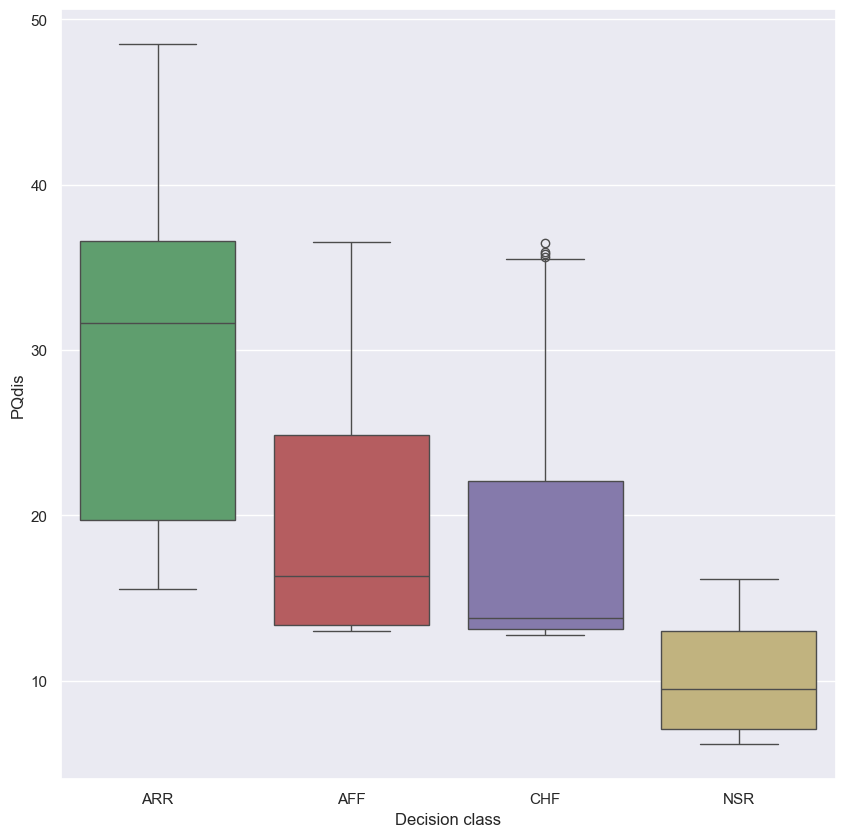

C:\Users\sebex\AppData\Local\Temp\ipykernel_2972\379383750.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dt, x="ECG_signal", y=attribute, palette=my_pal)


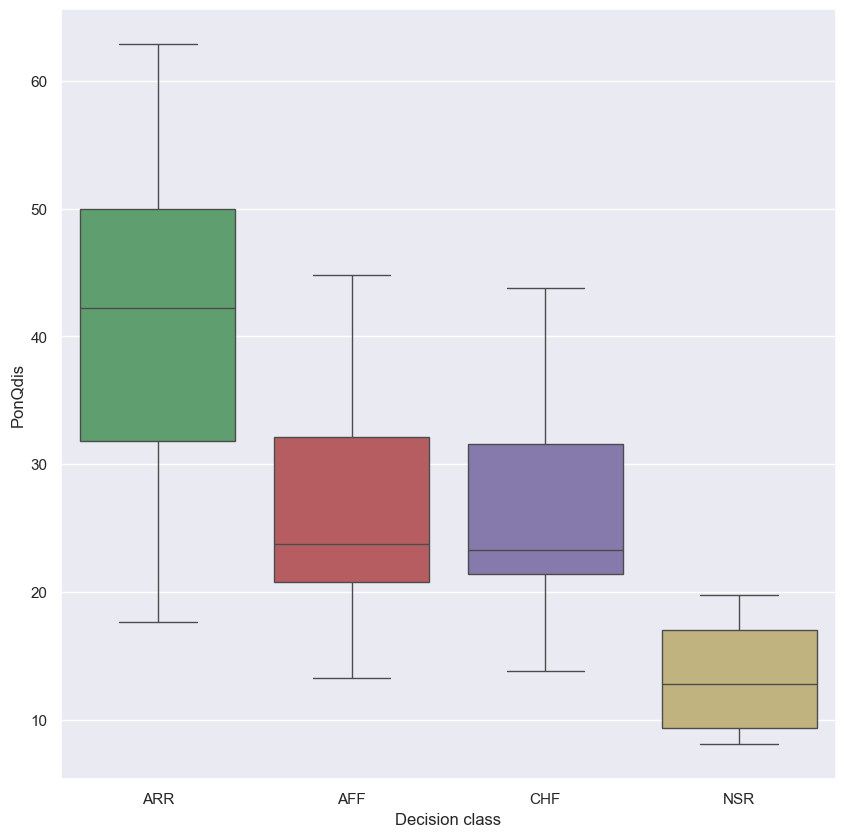

C:\Users\sebex\AppData\Local\Temp\ipykernel_2972\379383750.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dt, x="ECG_signal", y=attribute, palette=my_pal)


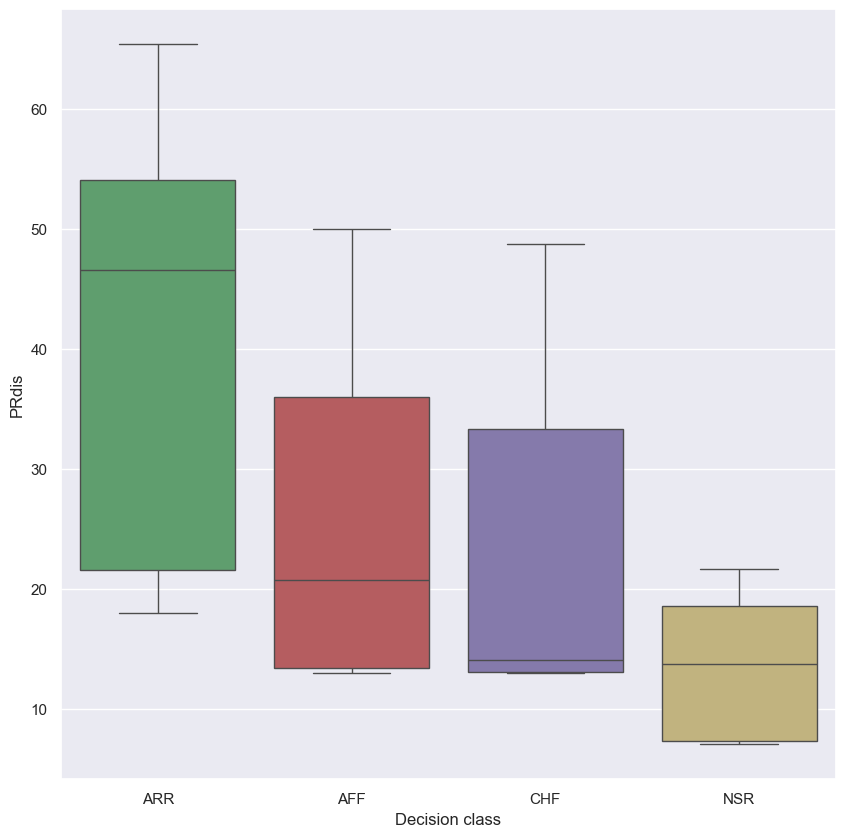

C:\Users\sebex\AppData\Local\Temp\ipykernel_2972\379383750.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dt, x="ECG_signal", y=attribute, palette=my_pal)


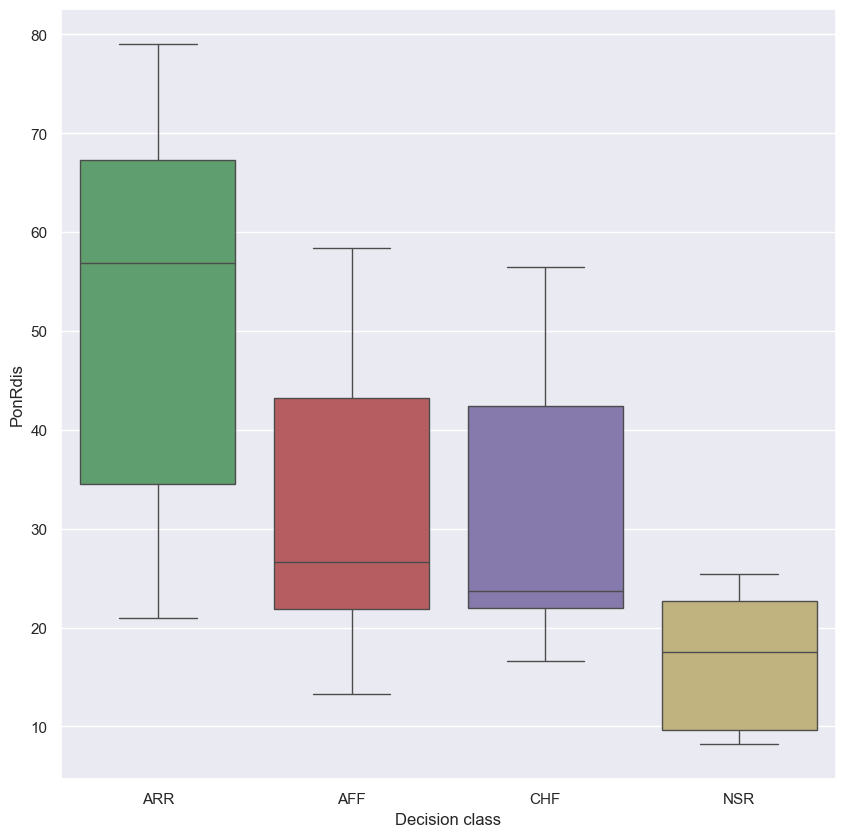

C:\Users\sebex\AppData\Local\Temp\ipykernel_2972\379383750.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dt, x="ECG_signal", y=attribute, palette=my_pal)


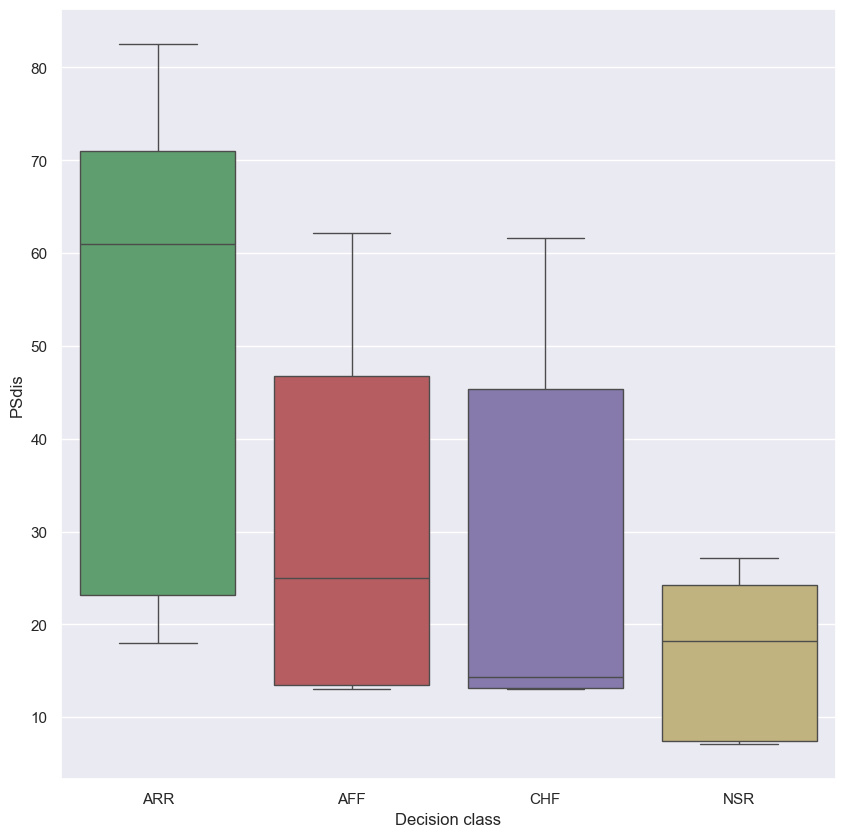

C:\Users\sebex\AppData\Local\Temp\ipykernel_2972\379383750.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dt, x="ECG_signal", y=attribute, palette=my_pal)


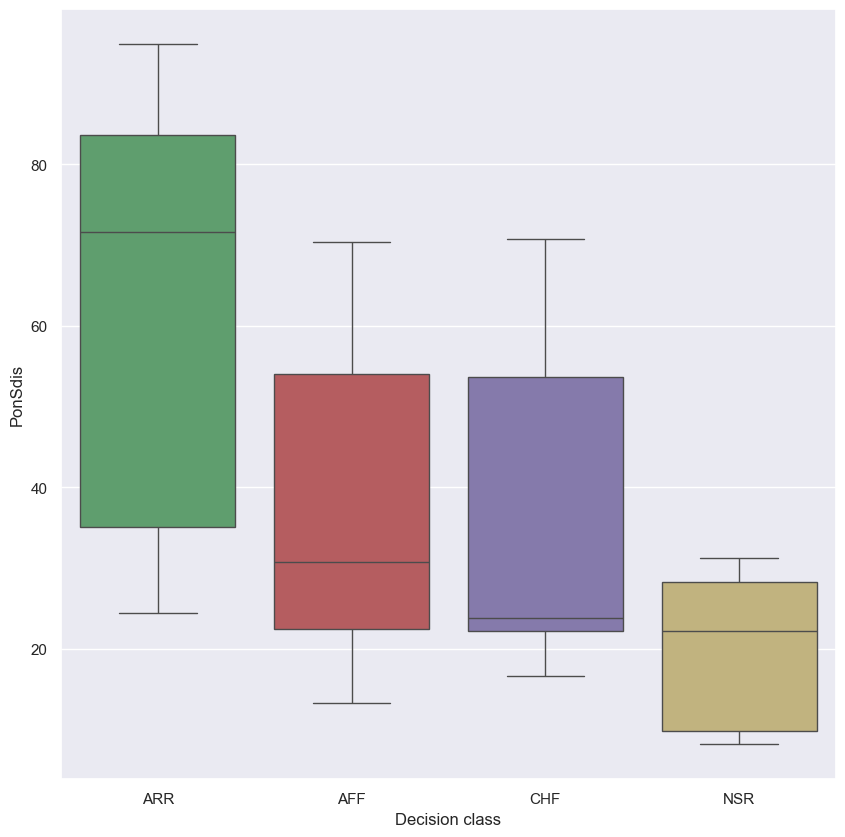

C:\Users\sebex\AppData\Local\Temp\ipykernel_2972\379383750.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dt, x="ECG_signal", y=attribute, palette=my_pal)


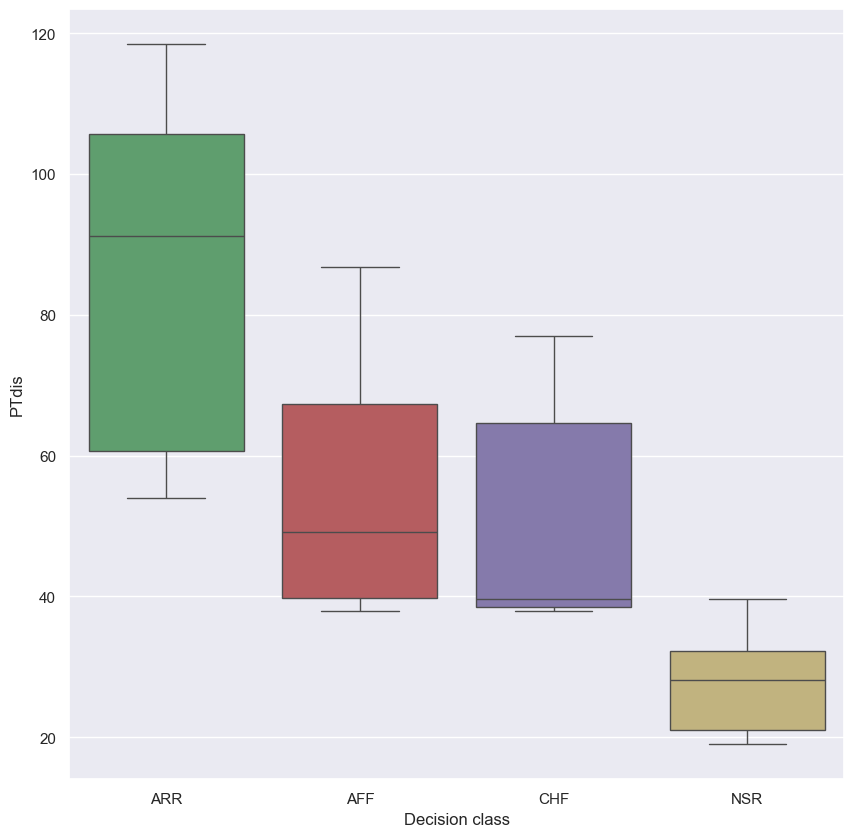

C:\Users\sebex\AppData\Local\Temp\ipykernel_2972\379383750.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dt, x="ECG_signal", y=attribute, palette=my_pal)


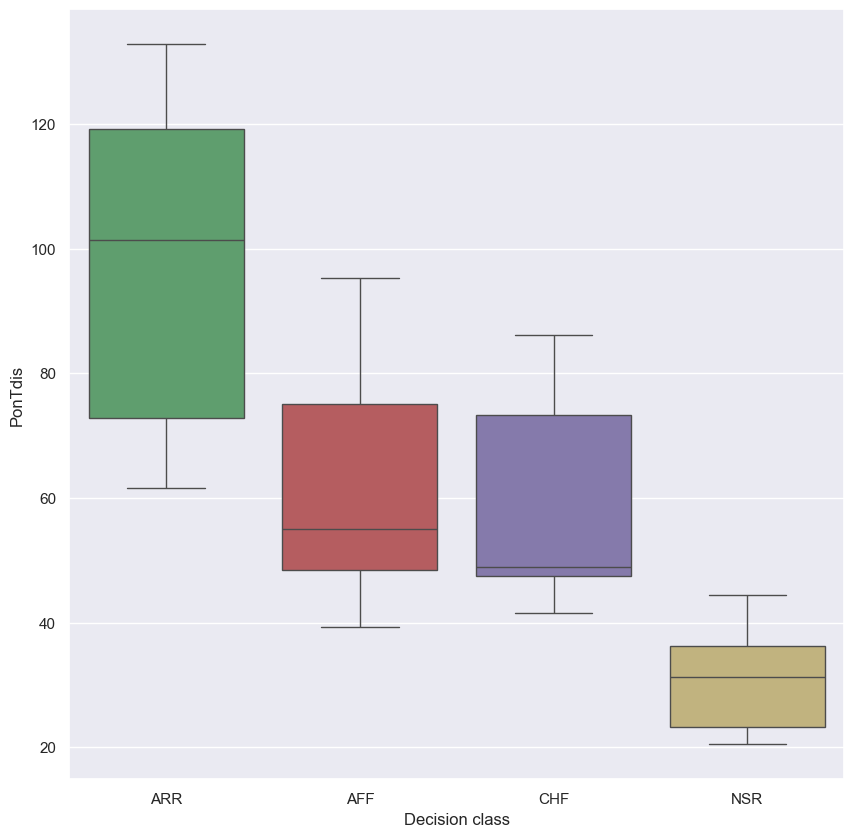

C:\Users\sebex\AppData\Local\Temp\ipykernel_2972\379383750.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dt, x="ECG_signal", y=attribute, palette=my_pal)


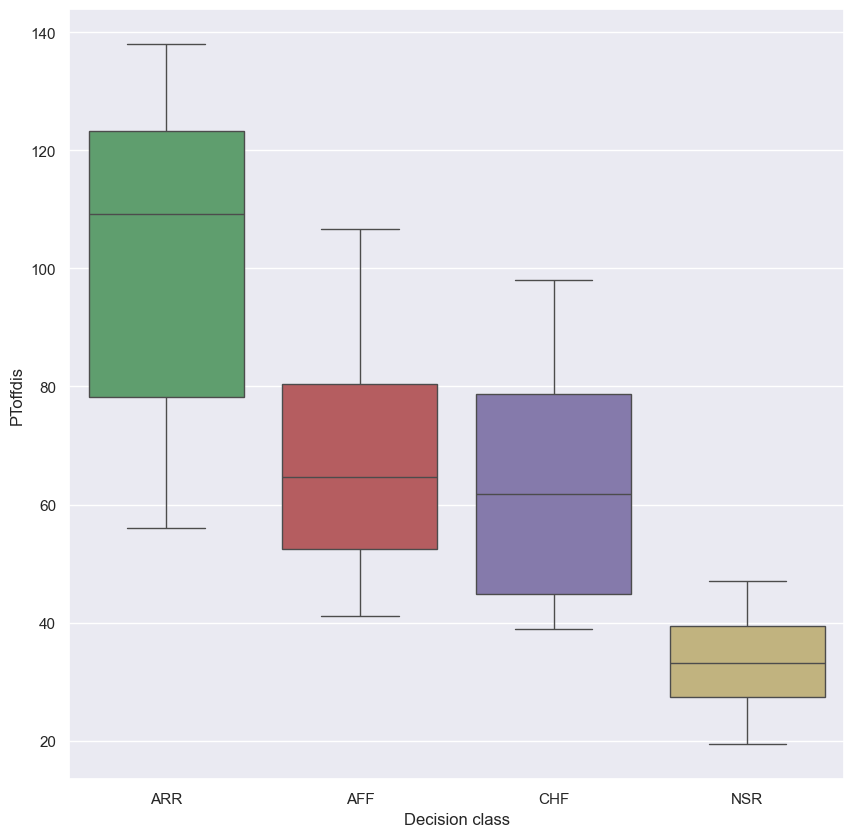

C:\Users\sebex\AppData\Local\Temp\ipykernel_2972\379383750.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dt, x="ECG_signal", y=attribute, palette=my_pal)


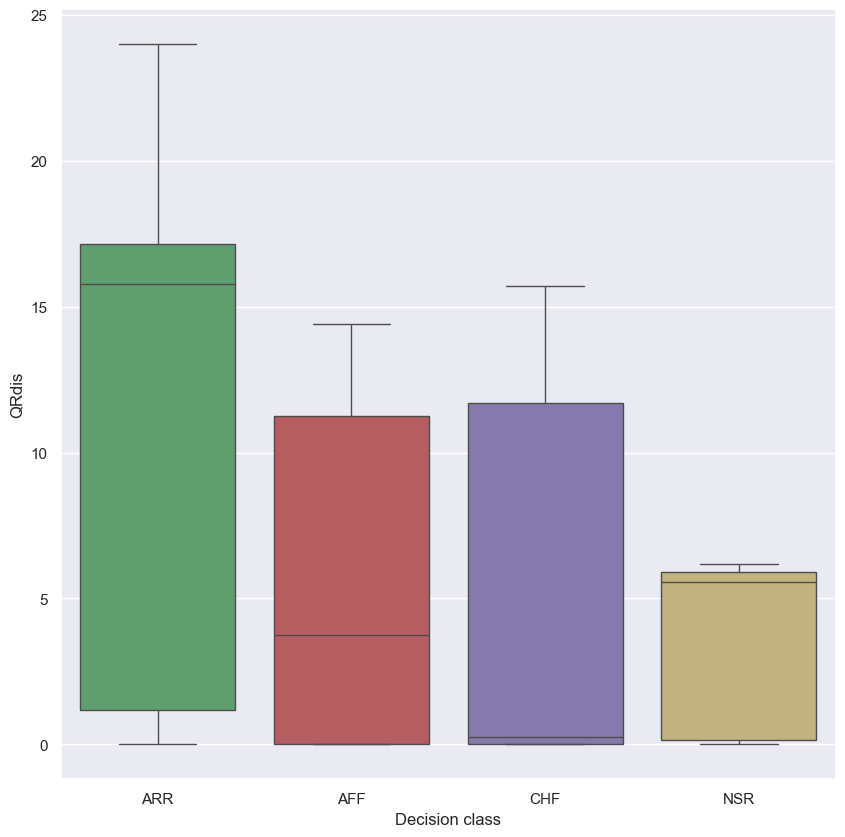

C:\Users\sebex\AppData\Local\Temp\ipykernel_2972\379383750.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dt, x="ECG_signal", y=attribute, palette=my_pal)


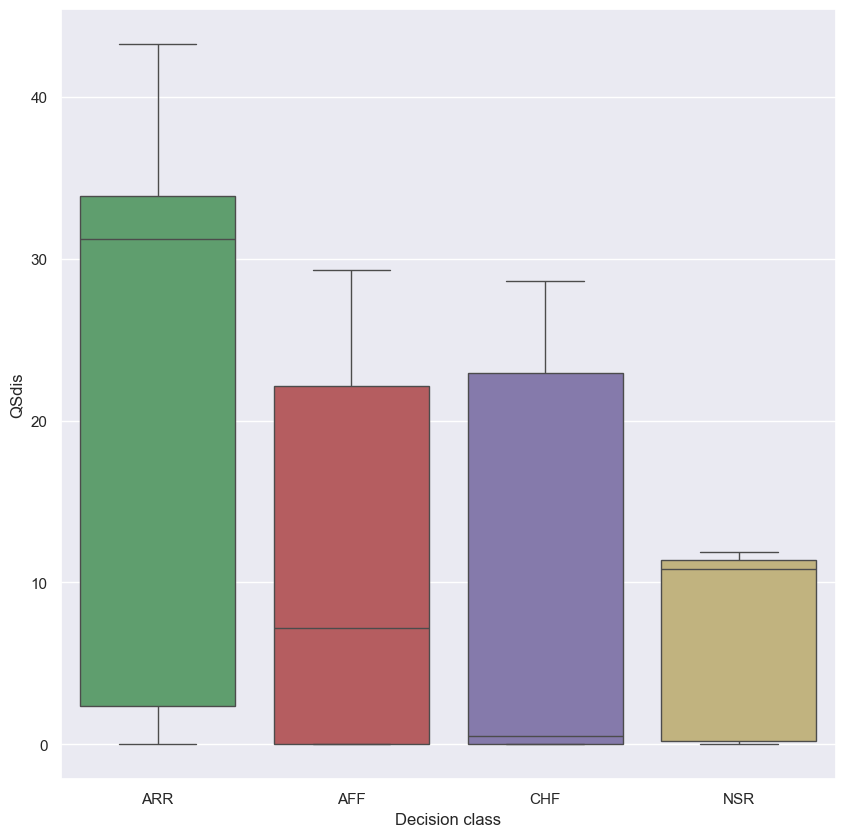

C:\Users\sebex\AppData\Local\Temp\ipykernel_2972\379383750.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dt, x="ECG_signal", y=attribute, palette=my_pal)


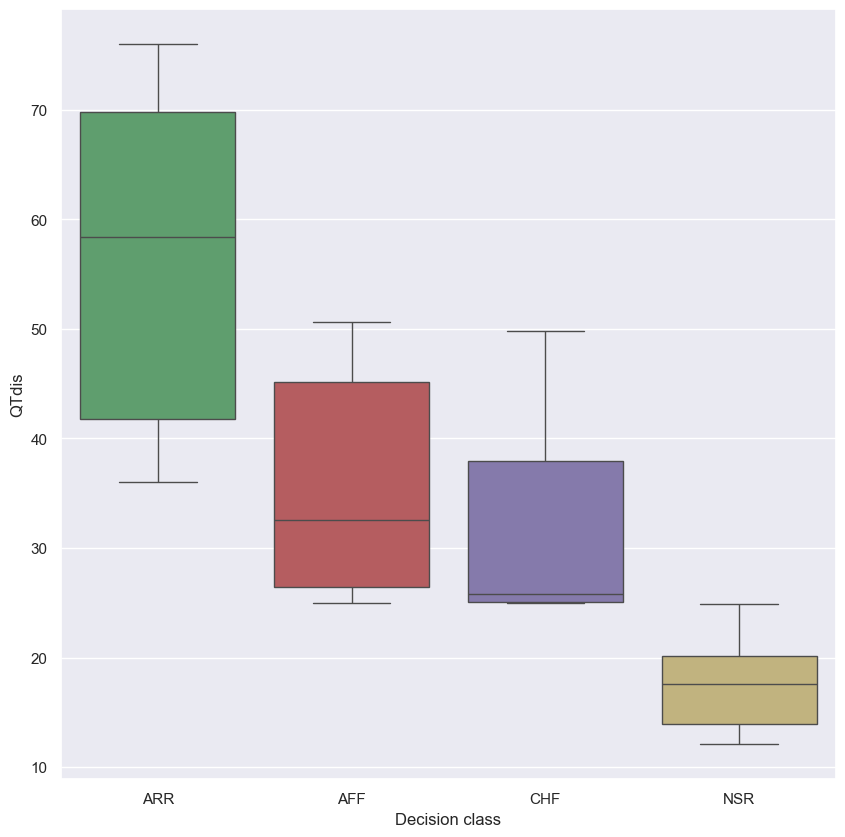

C:\Users\sebex\AppData\Local\Temp\ipykernel_2972\379383750.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dt, x="ECG_signal", y=attribute, palette=my_pal)


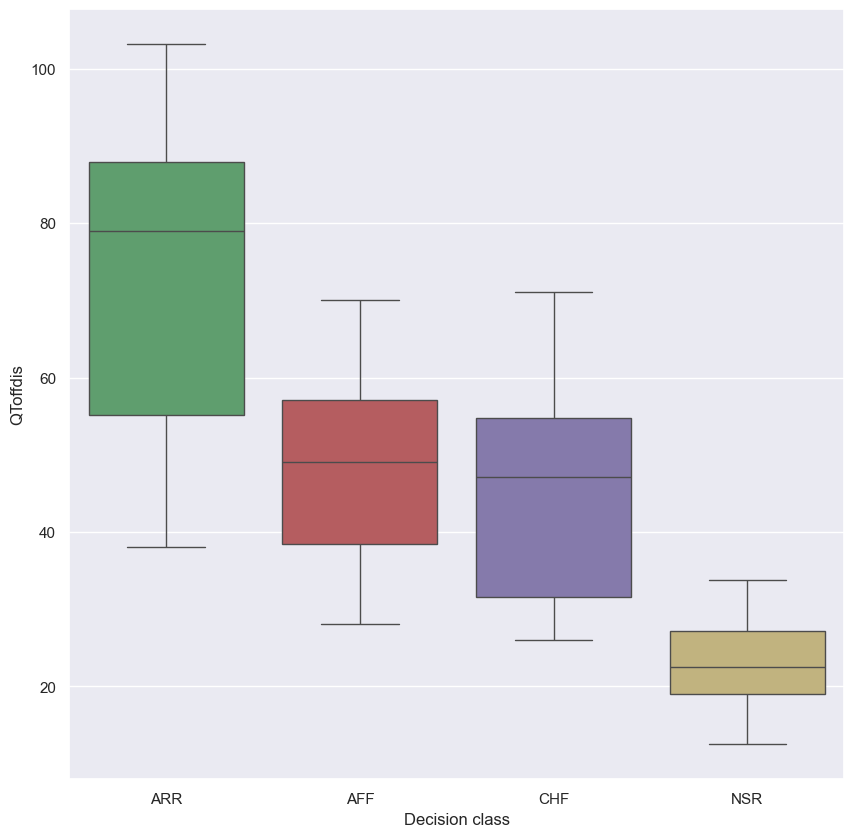

C:\Users\sebex\AppData\Local\Temp\ipykernel_2972\379383750.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dt, x="ECG_signal", y=attribute, palette=my_pal)


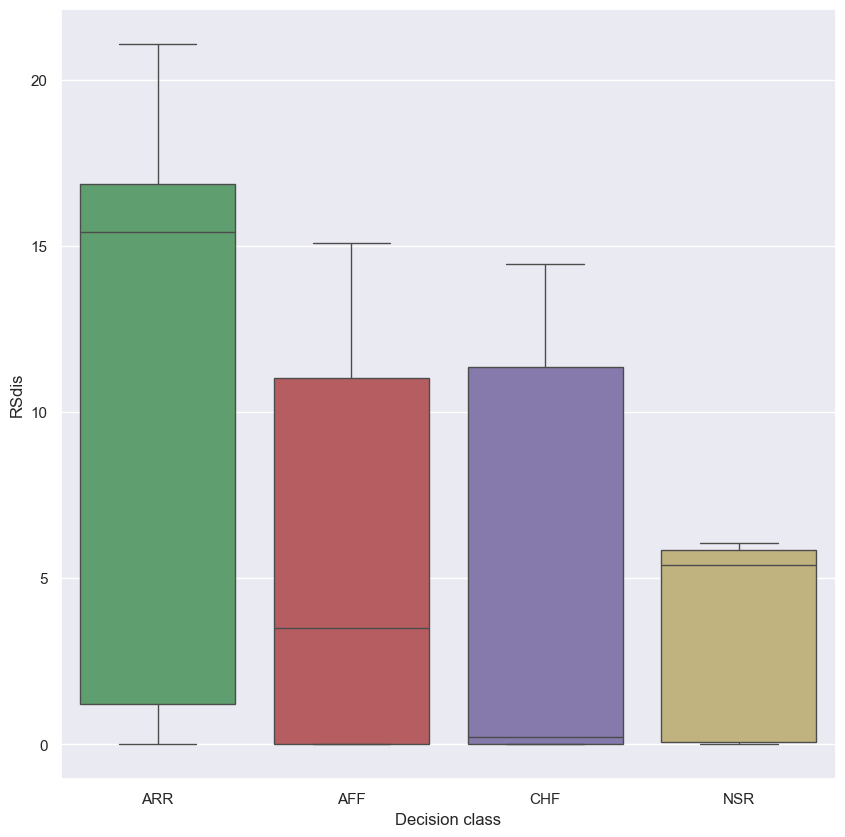

C:\Users\sebex\AppData\Local\Temp\ipykernel_2972\379383750.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dt, x="ECG_signal", y=attribute, palette=my_pal)


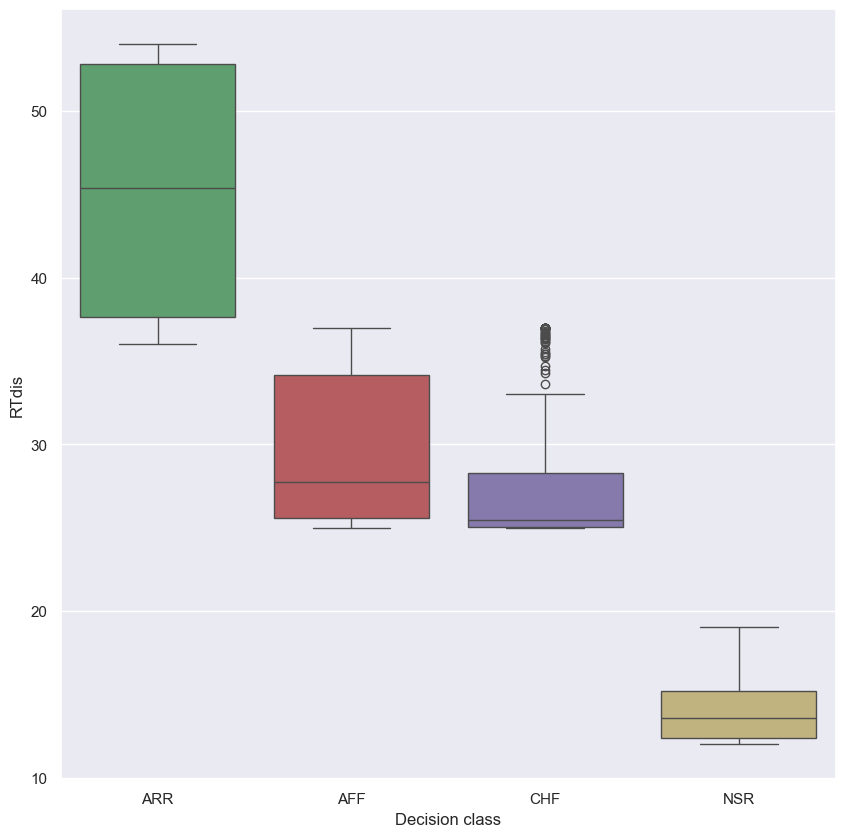

C:\Users\sebex\AppData\Local\Temp\ipykernel_2972\379383750.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dt, x="ECG_signal", y=attribute, palette=my_pal)


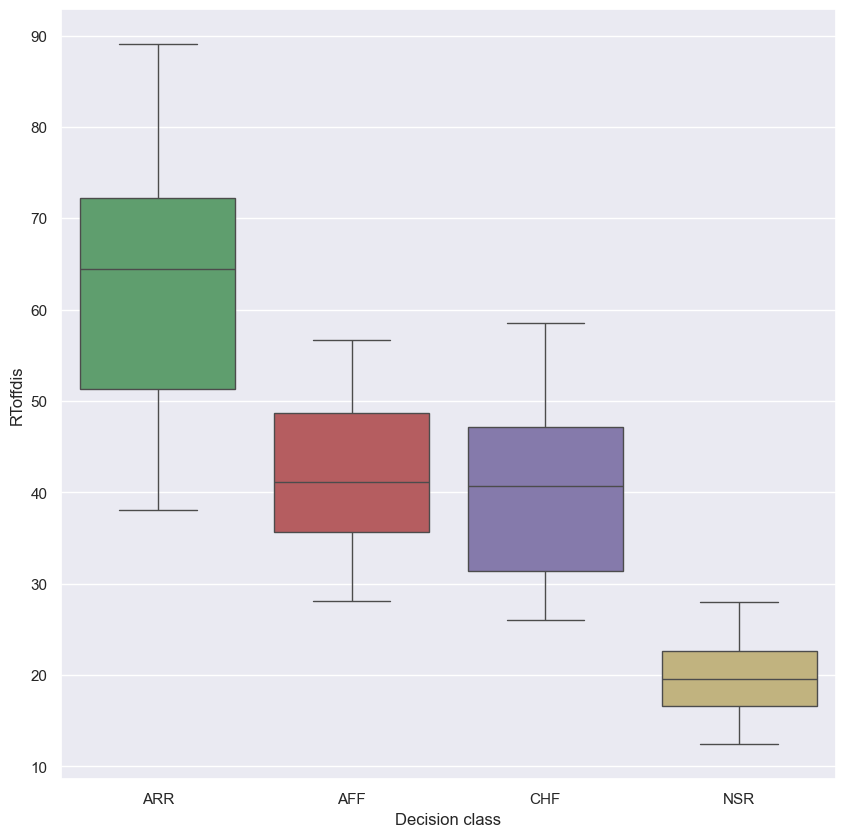

C:\Users\sebex\AppData\Local\Temp\ipykernel_2972\379383750.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dt, x="ECG_signal", y=attribute, palette=my_pal)


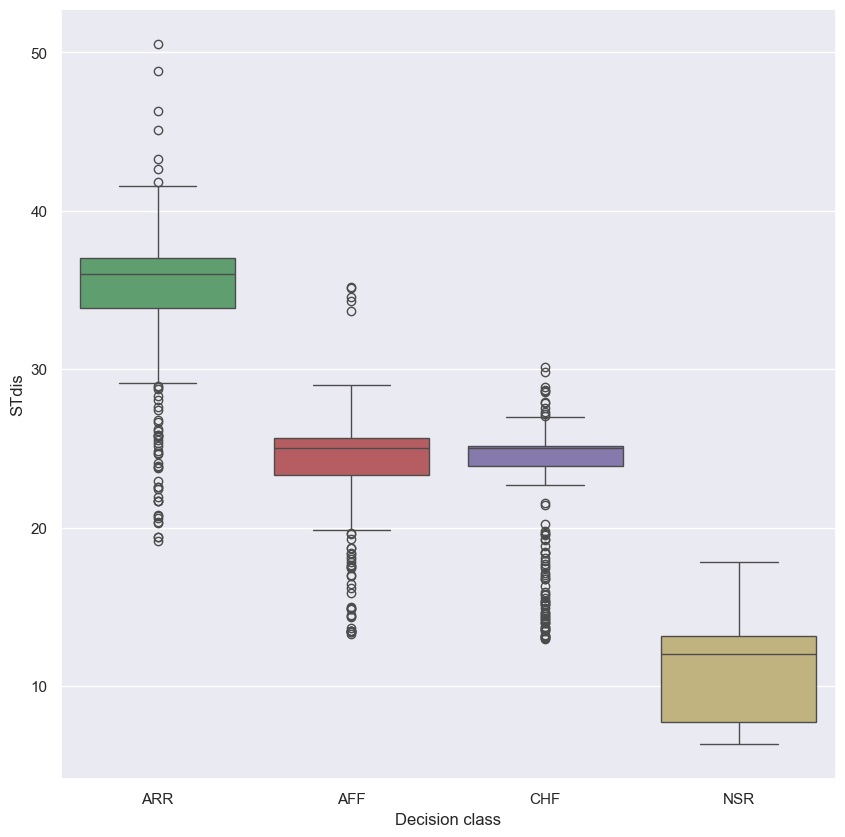

C:\Users\sebex\AppData\Local\Temp\ipykernel_2972\379383750.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dt, x="ECG_signal", y=attribute, palette=my_pal)


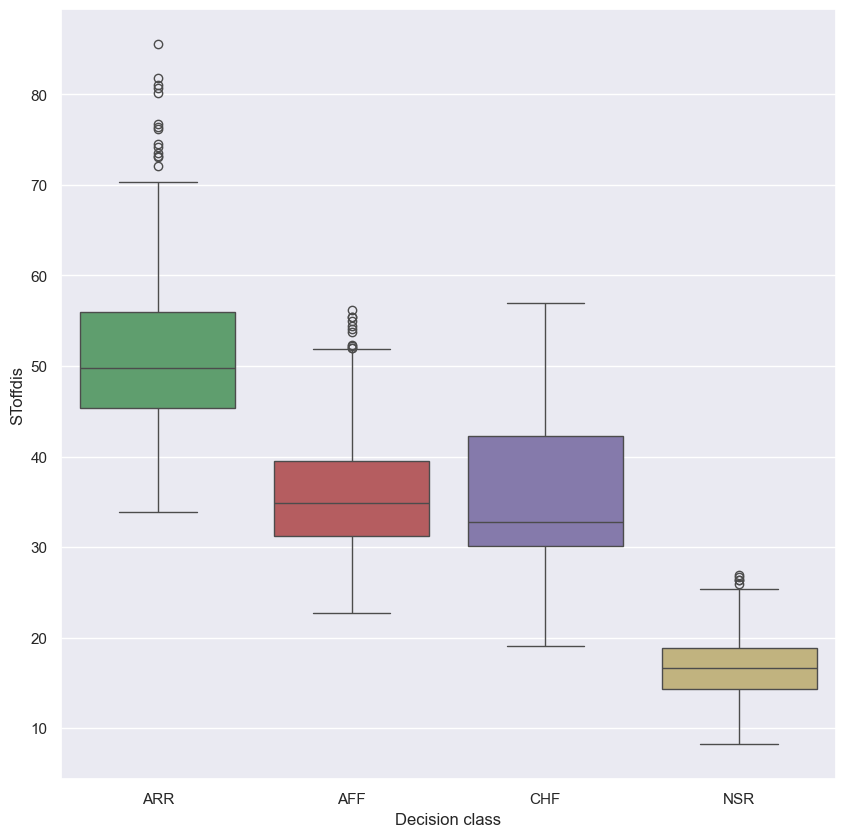

C:\Users\sebex\AppData\Local\Temp\ipykernel_2972\379383750.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dt, x="ECG_signal", y=attribute, palette=my_pal)


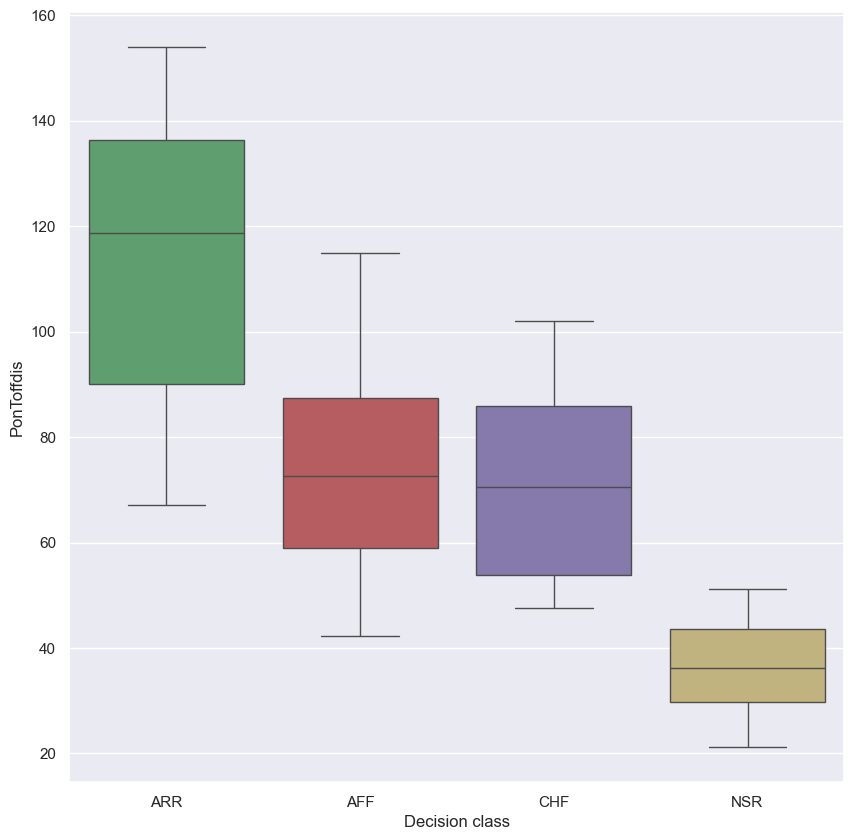

C:\Users\sebex\AppData\Local\Temp\ipykernel_2972\379383750.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dt, x="ECG_signal", y=attribute, palette=my_pal)


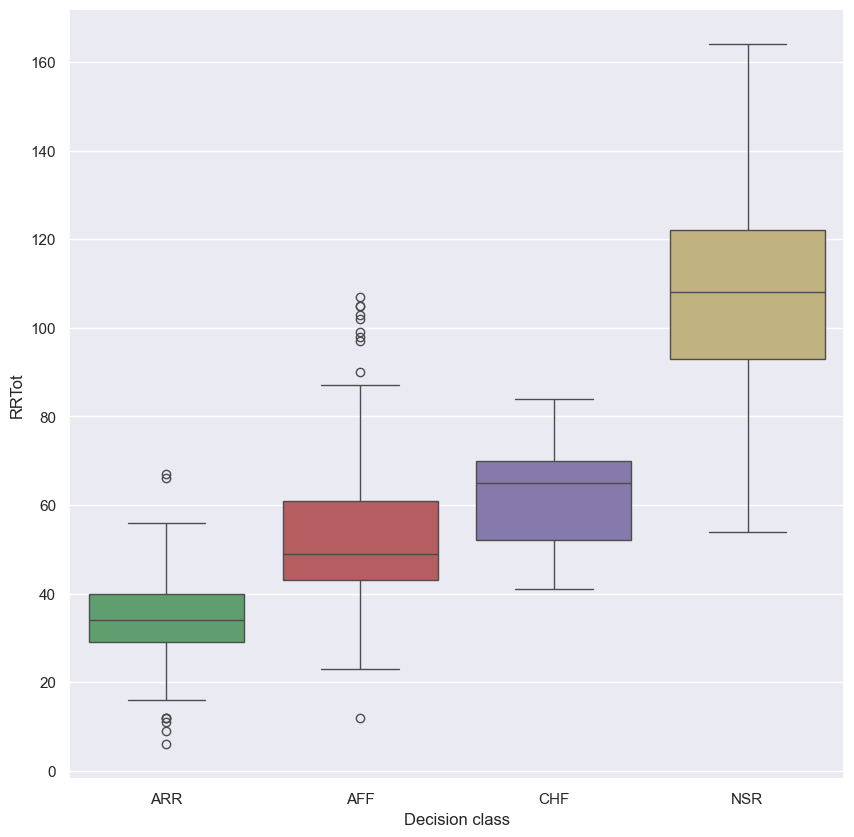

C:\Users\sebex\AppData\Local\Temp\ipykernel_2972\379383750.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dt, x="ECG_signal", y=attribute, palette=my_pal)


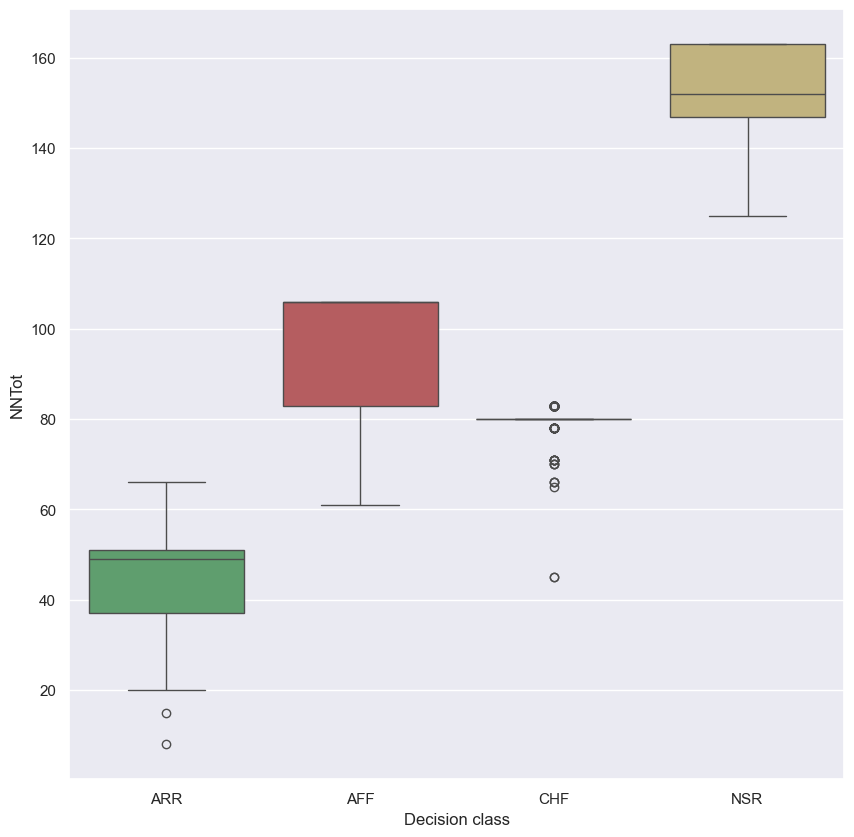

C:\Users\sebex\AppData\Local\Temp\ipykernel_2972\379383750.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dt, x="ECG_signal", y=attribute, palette=my_pal)


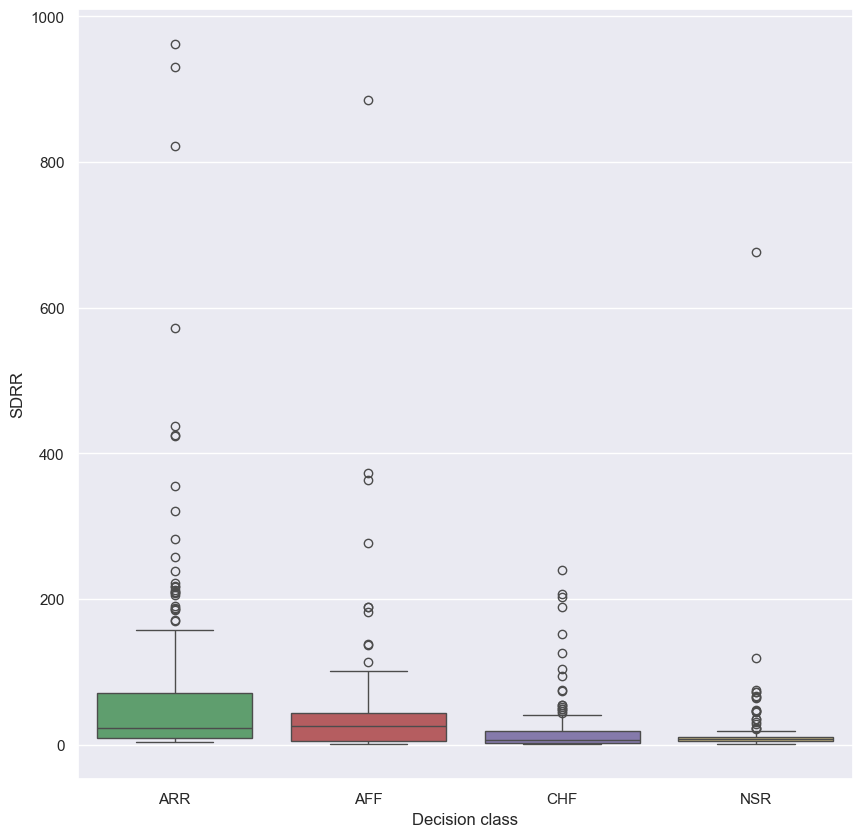

C:\Users\sebex\AppData\Local\Temp\ipykernel_2972\379383750.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dt, x="ECG_signal", y=attribute, palette=my_pal)


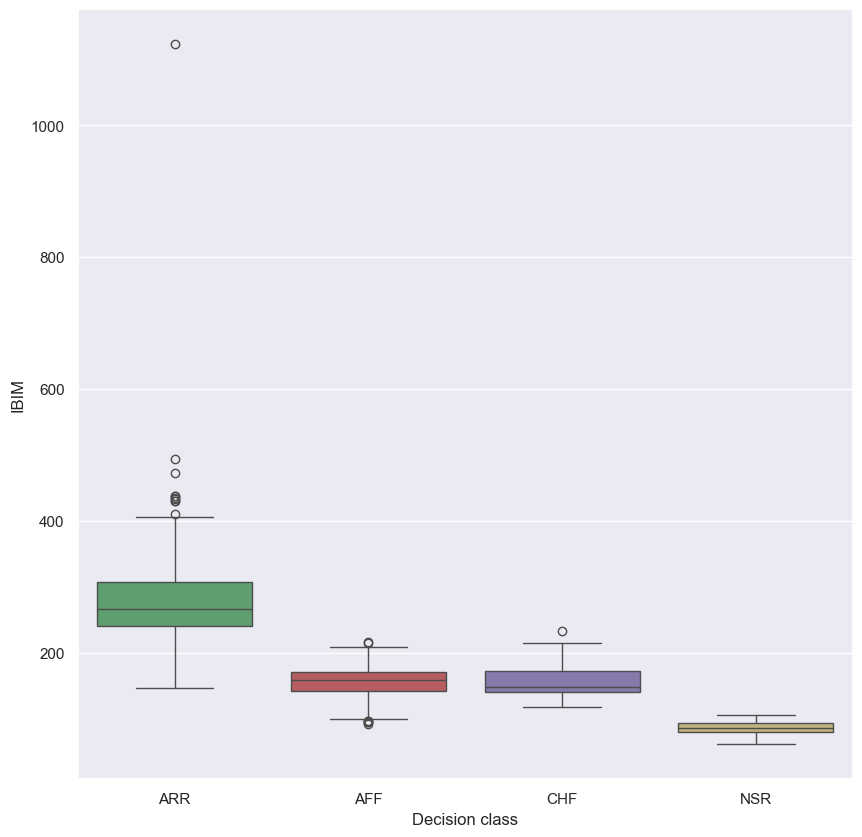

C:\Users\sebex\AppData\Local\Temp\ipykernel_2972\379383750.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dt, x="ECG_signal", y=attribute, palette=my_pal)


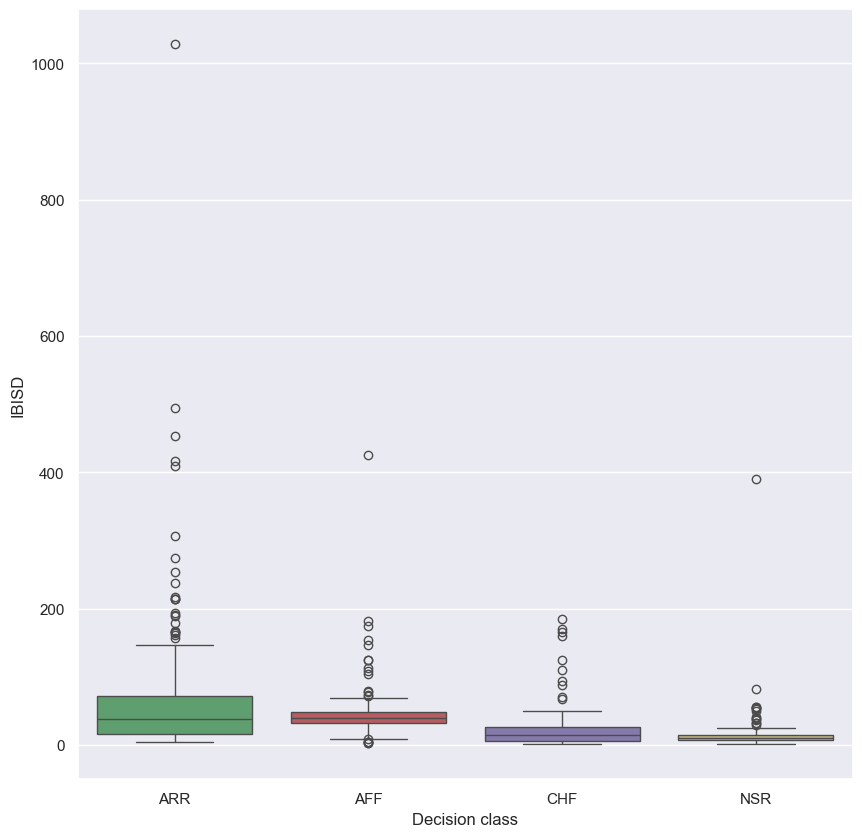

C:\Users\sebex\AppData\Local\Temp\ipykernel_2972\379383750.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dt, x="ECG_signal", y=attribute, palette=my_pal)


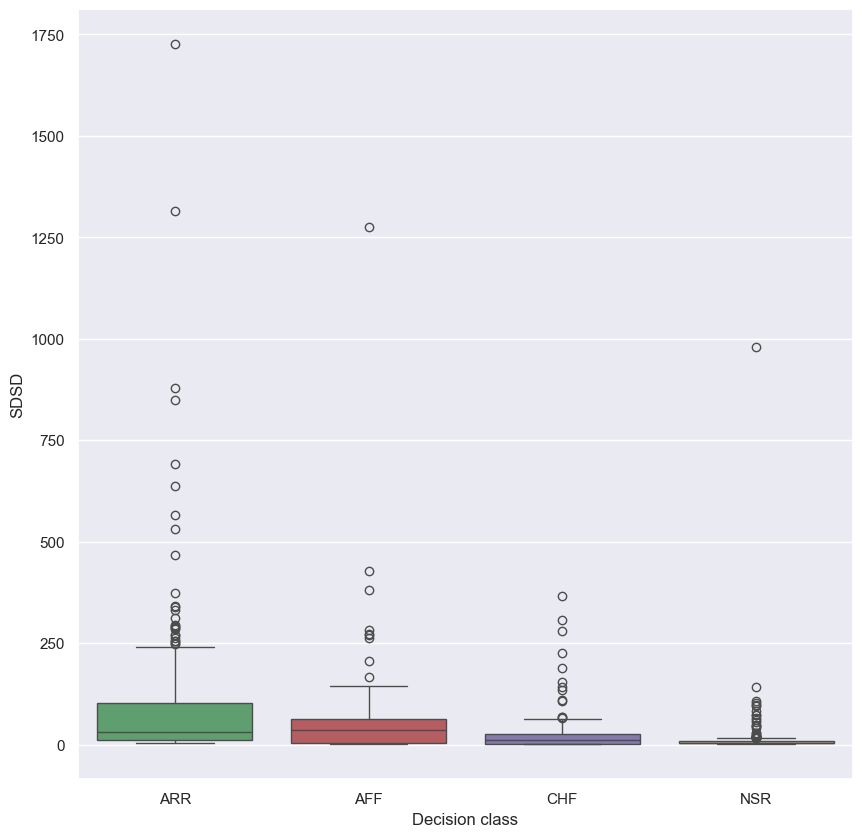

C:\Users\sebex\AppData\Local\Temp\ipykernel_2972\379383750.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dt, x="ECG_signal", y=attribute, palette=my_pal)


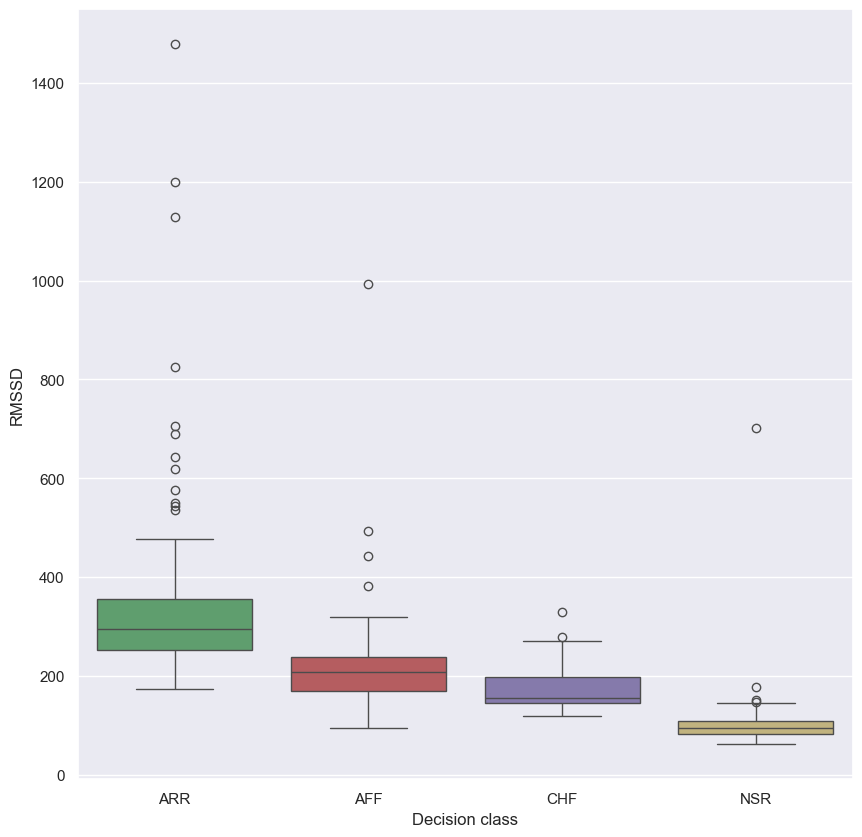

C:\Users\sebex\AppData\Local\Temp\ipykernel_2972\379383750.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dt, x="ECG_signal", y=attribute, palette=my_pal)


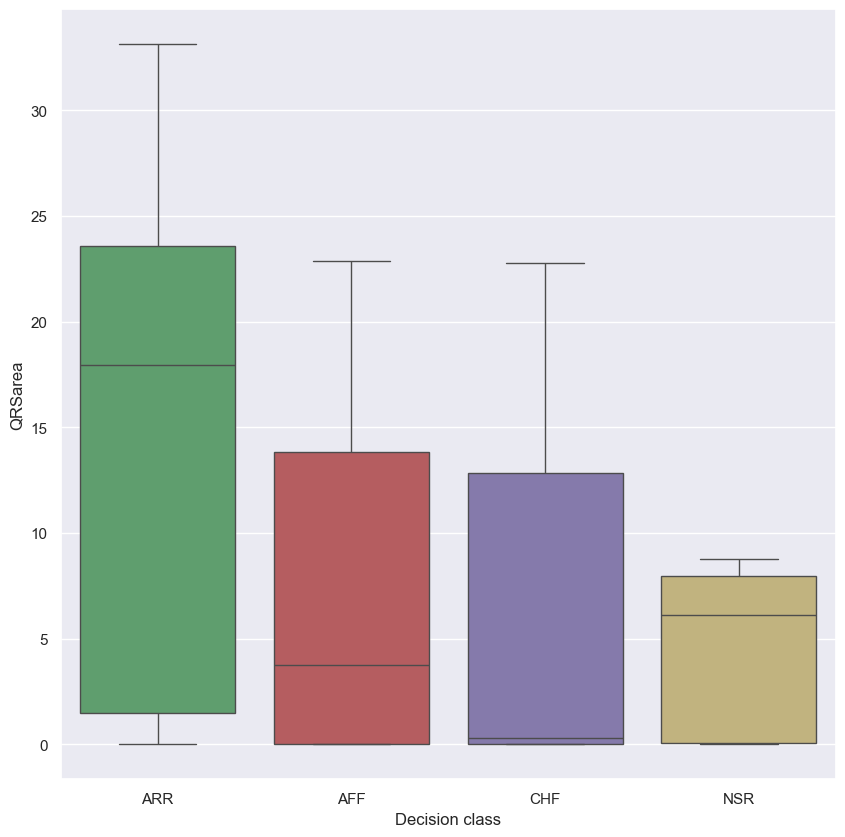

C:\Users\sebex\AppData\Local\Temp\ipykernel_2972\379383750.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dt, x="ECG_signal", y=attribute, palette=my_pal)


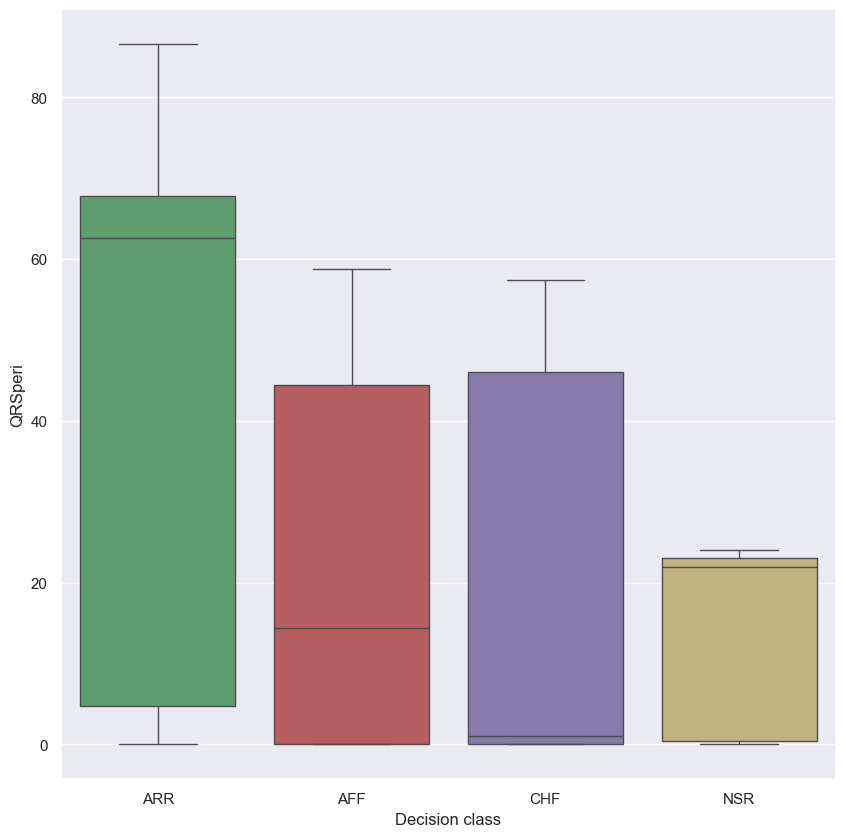

C:\Users\sebex\AppData\Local\Temp\ipykernel_2972\379383750.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dt, x="ECG_signal", y=attribute, palette=my_pal)


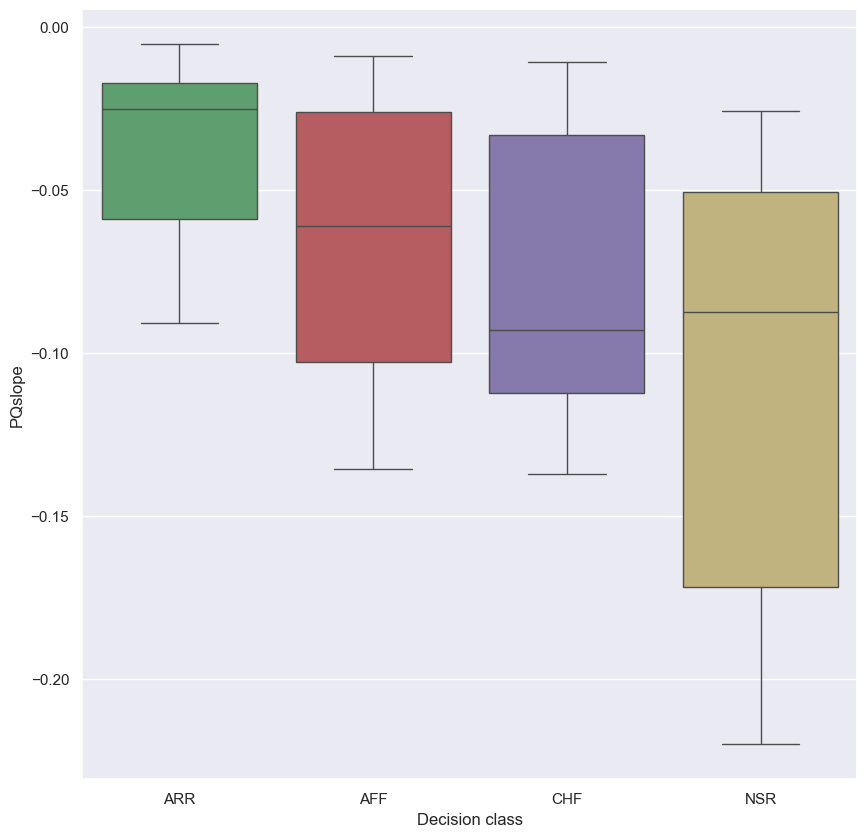

C:\Users\sebex\AppData\Local\Temp\ipykernel_2972\379383750.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dt, x="ECG_signal", y=attribute, palette=my_pal)


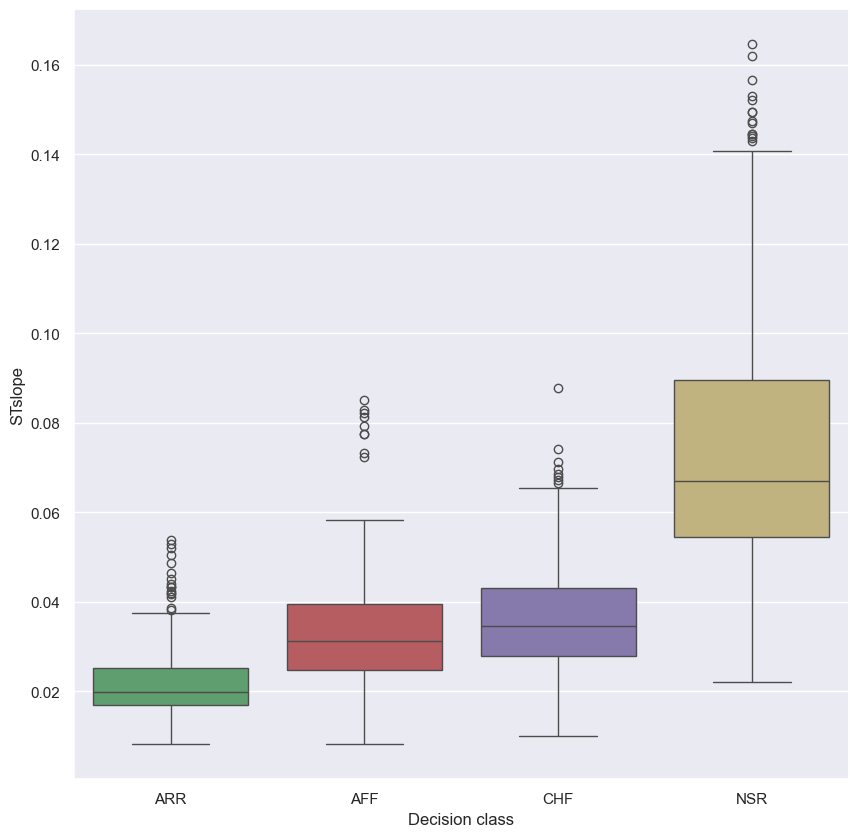

C:\Users\sebex\AppData\Local\Temp\ipykernel_2972\379383750.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dt, x="ECG_signal", y=attribute, palette=my_pal)


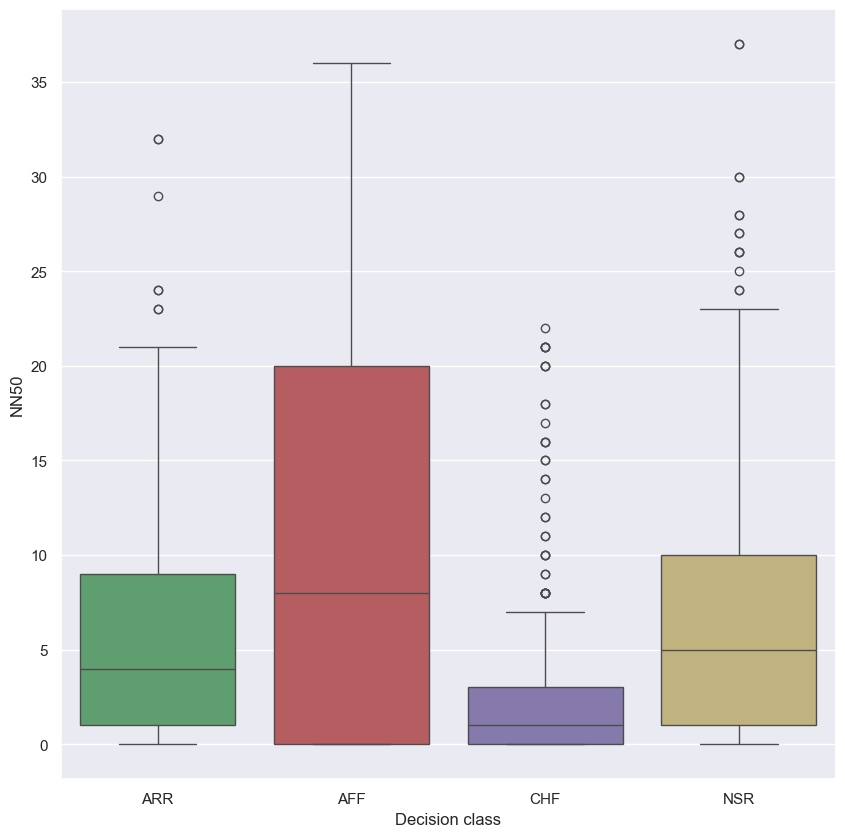

C:\Users\sebex\AppData\Local\Temp\ipykernel_2972\379383750.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dt, x="ECG_signal", y=attribute, palette=my_pal)


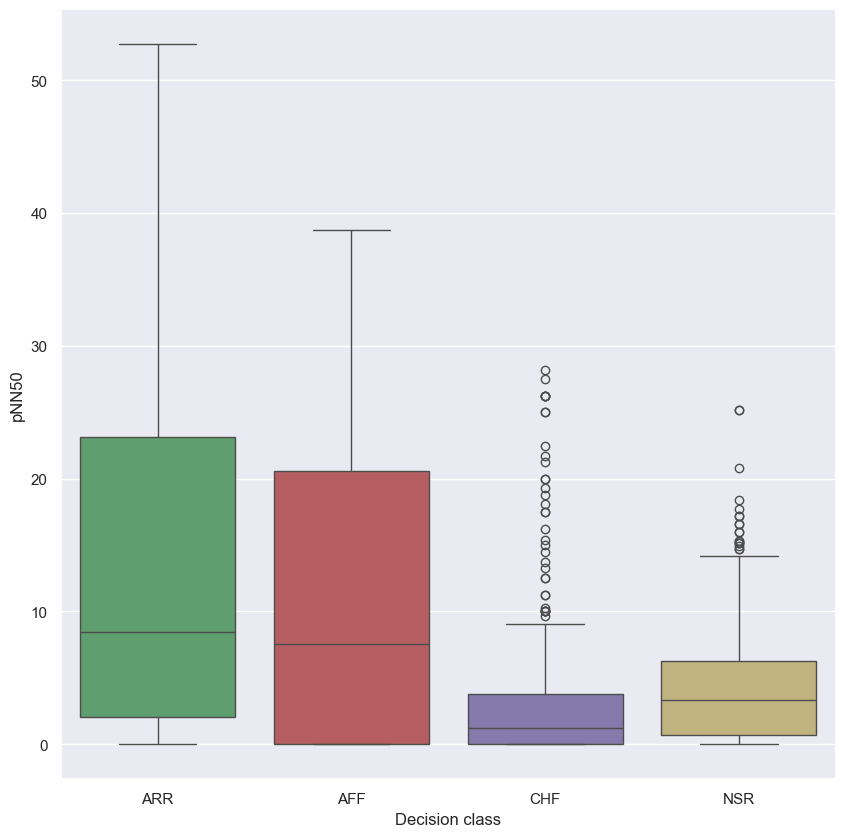

C:\Users\sebex\AppData\Local\Temp\ipykernel_2972\379383750.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dt, x="ECG_signal", y=attribute, palette=my_pal)


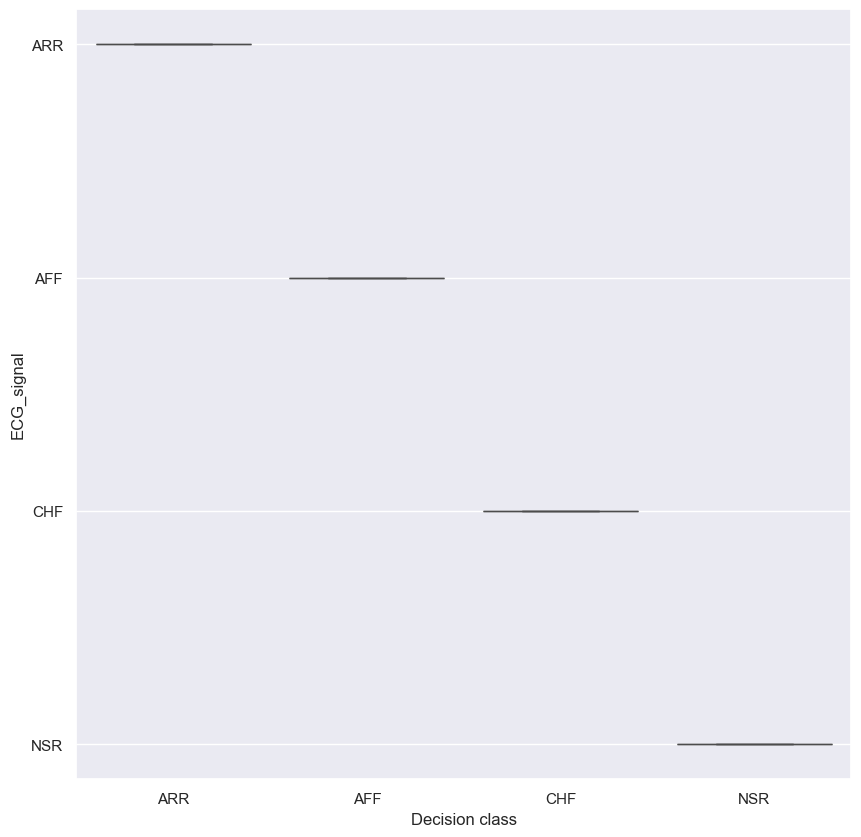

In [43]:
for attribute in dt.columns:
    plt.figure(figsize=(10, 10))
    my_pal = {"ARR": "g", "AFF": "r", "CHF": "m", "NSR": "y"}
    sns.boxplot(data=dt, x="ECG_signal", y=attribute, palette=my_pal)
    plt.xlabel("Decision class")
    plt.ylabel(attribute)
    plt.show()